## Impact Energetique de l'Intelligence Artificielle

**Source:** The Shift Project 2025  
**Date:** Decembre 2024  
**Resolution:** 300 DPI (haute qualite)  
**Donnees:** Extraction directe des fichiers Excel TSP

---

**Données** extraites des fichiers Excel du Shift Project.

## Configuration et Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from pathlib import Path
import warnings
import os
warnings.filterwarnings('ignore')

# Configuration graphiques
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
sns.set_style('whitegrid')

# Creer dossier pour les graphiques
output_dir = Path('graphs')
output_dir.mkdir(exist_ok=True)

print('Configuration terminee')
print(f'Dossier de sortie: {output_dir.absolute()}')

Configuration terminee
Dossier de sortie: c:\Users\mahmo\OneDrive\Documents\Energy wall\graphs


## Chargement des Donnees Reelles

In [3]:
# Fichiers source
file_cdc = 'data/TheShiftProject_Monde_CentresDeDonnees_2025 (1).xlsx'
file_ia = 'data/TheShiftProject_Monde_IA_2025.xlsx.xlsx'
file_france = 'data/TheShiftProject_France_2025.xlsx.xlsx'

print('Chargement des donnees...')
print('Fichiers disponibles:')
print(f'  - {file_cdc}')
print(f'  - {file_ia}')
print(f'  - {file_france}')

Chargement des donnees...
Fichiers disponibles:
  - data/TheShiftProject_Monde_CentresDeDonnees_2025 (1).xlsx
  - data/TheShiftProject_Monde_IA_2025.xlsx.xlsx
  - data/TheShiftProject_France_2025.xlsx.xlsx


---

## Graphique 1: Etat des Lieux 2024

**Donnees:** Feuille "Analyse graphique SE" du fichier Monde IA  
**Valeurs 2025 IA:** Trad AI Training=20, Trad AI Inference=18, Gen AI Training=47, Gen AI Inference=15

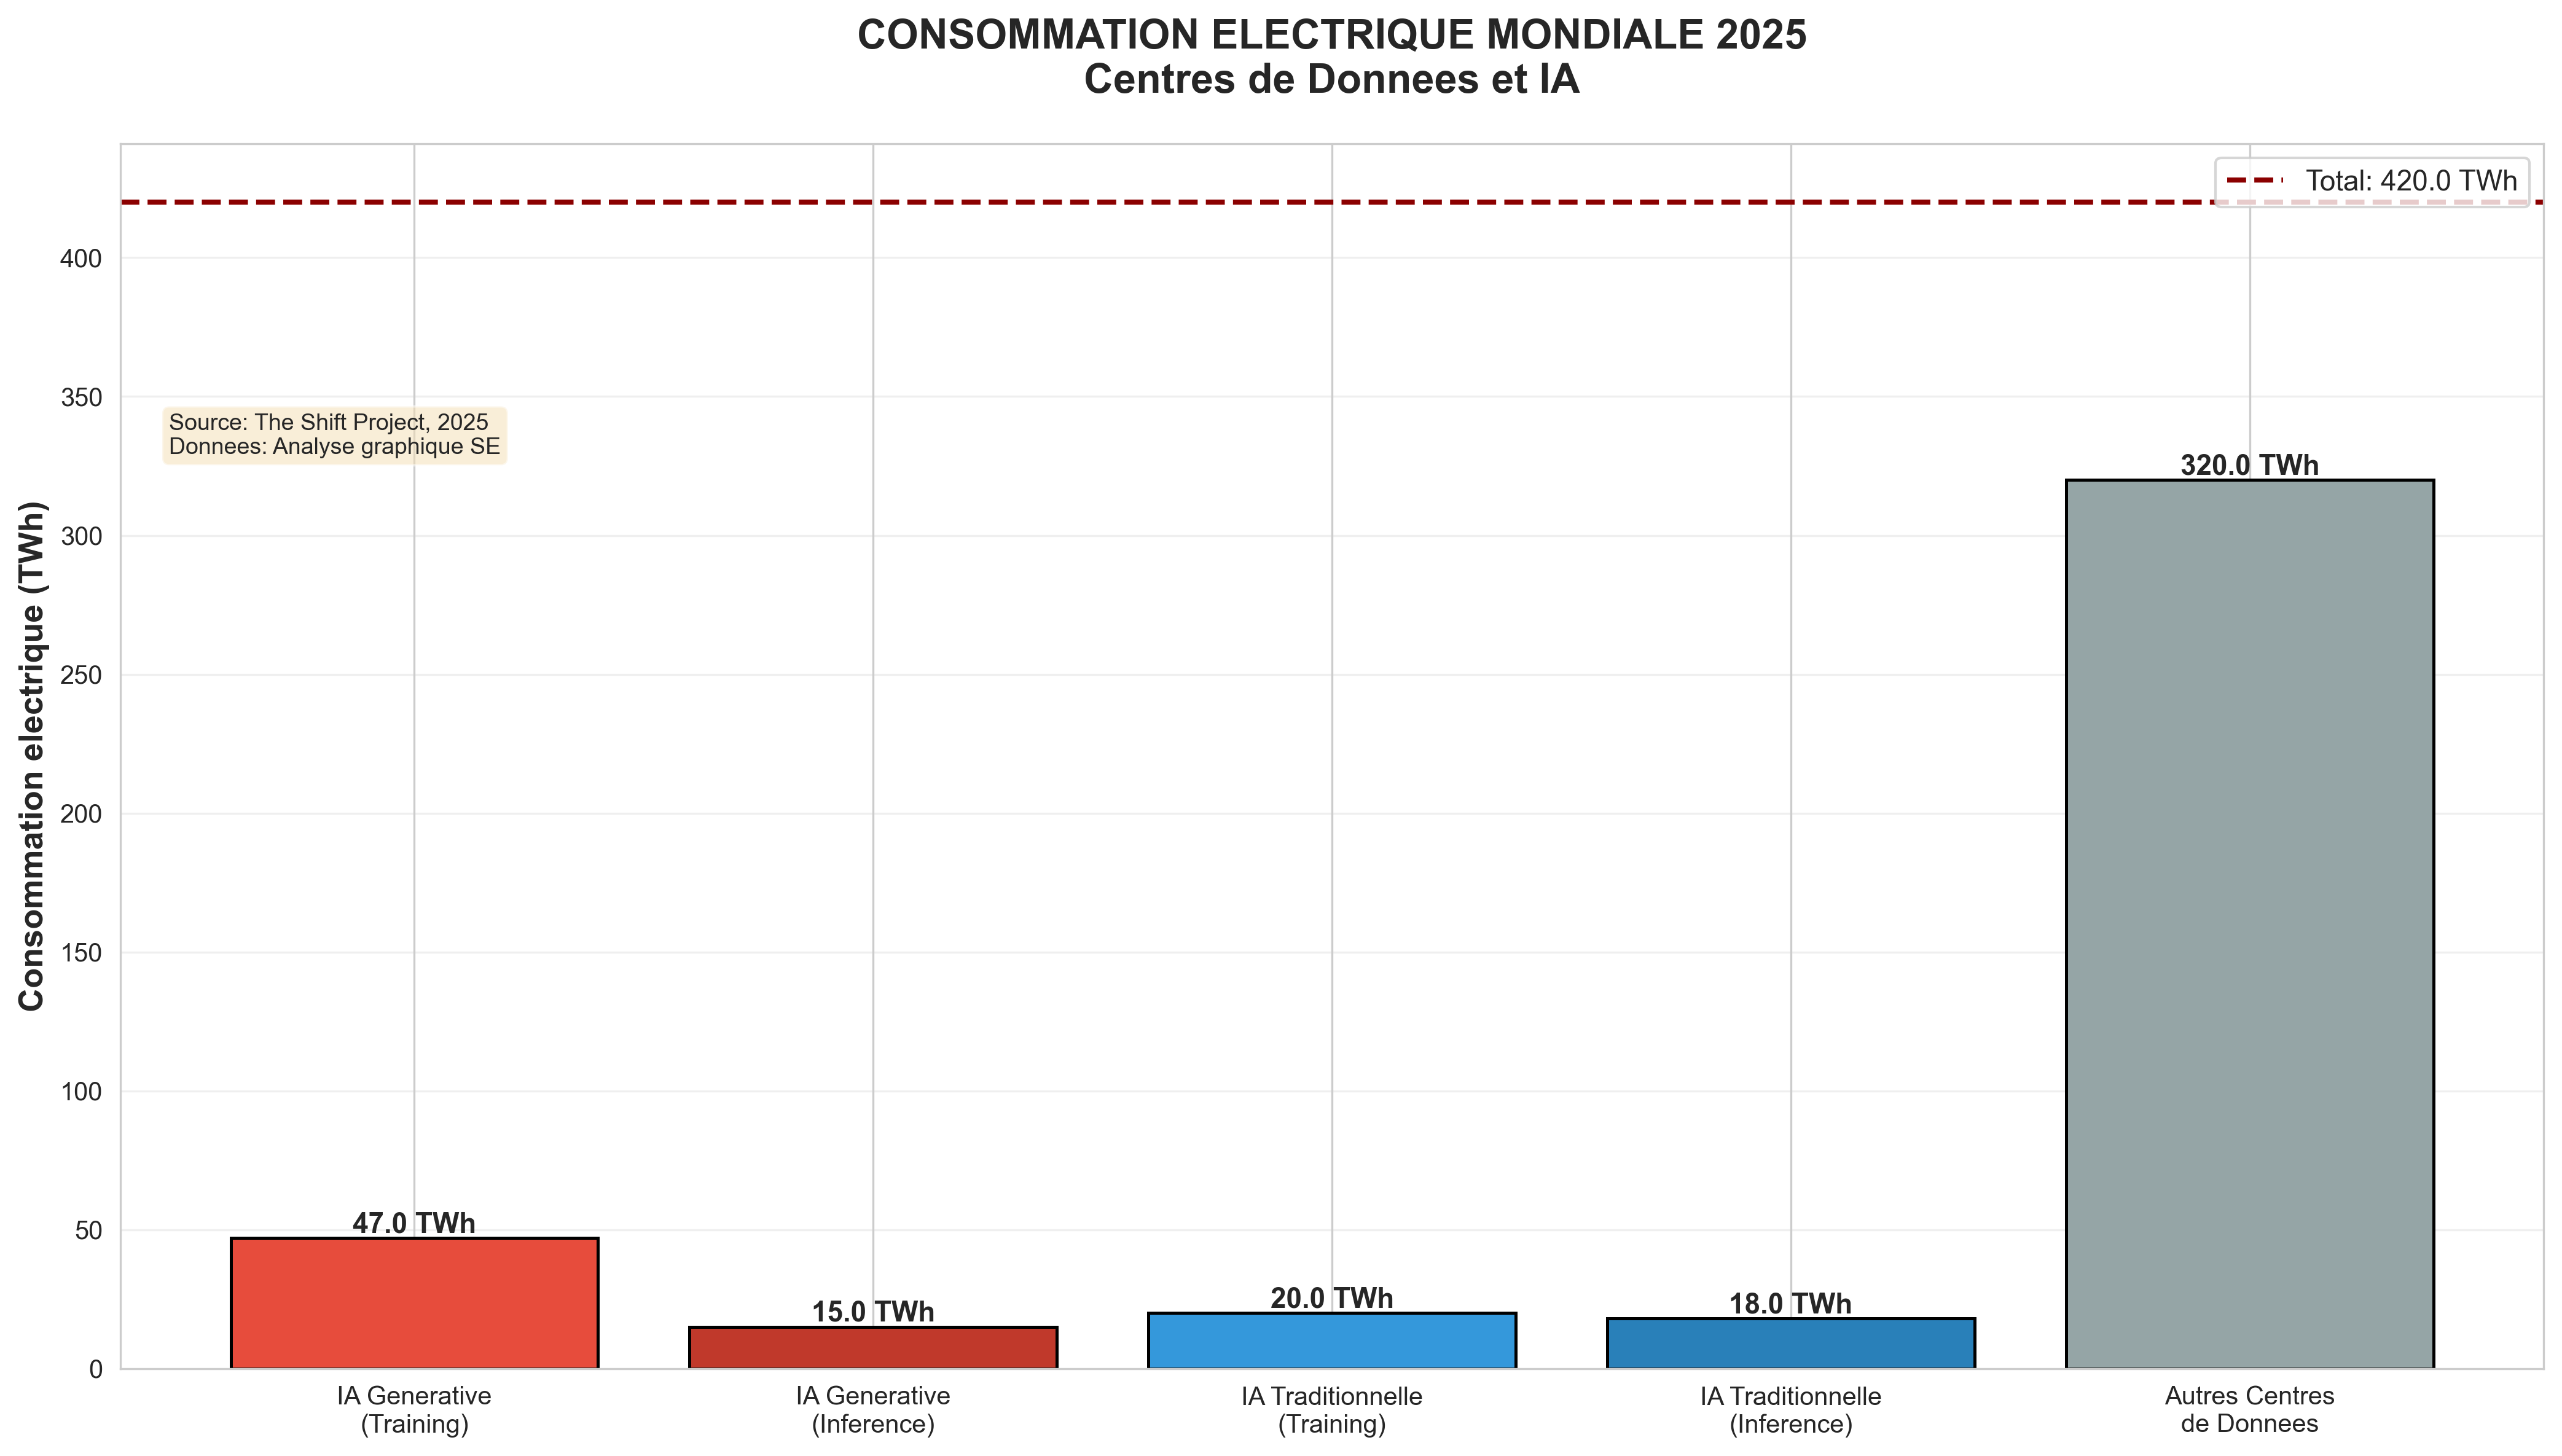

Graphique 1 cree - Donnees: [np.float64(47.0), np.float64(15.0), np.float64(20.0), np.float64(18.0), 320]


In [17]:
# Charger les donnees reelles de la feuille "Analyse graphique SE"
df_ia_se = pd.read_excel(file_ia, sheet_name='Analyse graphique SE', header=None)

# Extraire les valeurs 2025 (colonne 10, lignes 2-7)
# Ligne 2: Trad AI Training = 20
# Ligne 3: Trad AI Inference = 18
# Ligne 5: Gen AI Training = 47
# Ligne 6: Gen AI Inference = 15
trad_ai_training = df_ia_se.iloc[2, 10]  # 20 TWh
trad_ai_inference = df_ia_se.iloc[3, 10]  # 18 TWh
gen_ai_training = df_ia_se.iloc[5, 10]    # 47 TWh
gen_ai_inference = df_ia_se.iloc[6, 10]   # 15 TWh

# Autres centres de donnees (estimation basee sur total 420 TWh - 100 TWh IA = 320 TWh)
autres_cdc = 320

categories = [
    'IA Generative\n(Training)',
    'IA Generative\n(Inference)',
    'IA Traditionnelle\n(Training)',
    'IA Traditionnelle\n(Inference)',
    'Autres Centres\nde Donnees'
]
valeurs = [gen_ai_training, gen_ai_inference, trad_ai_training, trad_ai_inference, autres_cdc]
colors = ['#e74c3c', '#c0392b', '#3498db', '#2980b9', '#95a5a6']

# Creation du graphique
fig, ax = plt.subplots(figsize=(14, 8))
bars = ax.bar(categories, valeurs, color=colors, edgecolor='black', linewidth=1.2)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height} TWh',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

total = sum(valeurs)
ax.axhline(y=total, color='darkred', linestyle='--', linewidth=2,
           label=f'Total: {total} TWh')

ax.set_ylabel('Consommation electrique (TWh)', fontsize=13, fontweight='bold')
ax.set_title('CONSOMMATION ELECTRIQUE MONDIALE 2025\nCentres de Donnees et IA',
             fontsize=16, fontweight='bold', pad=20)
ax.legend(fontsize=11, loc='upper right')
ax.grid(axis='y', alpha=0.3)

ax.text(0.02, 0.78, 'Source: The Shift Project, 2025\nDonnees: Analyse graphique SE',
        transform=ax.transAxes, fontsize=9, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig(output_dir / '01_etat_lieux.png', dpi=300, bbox_inches='tight')
plt.show()

print(f'Graphique 1 cree - Donnees: {valeurs}')

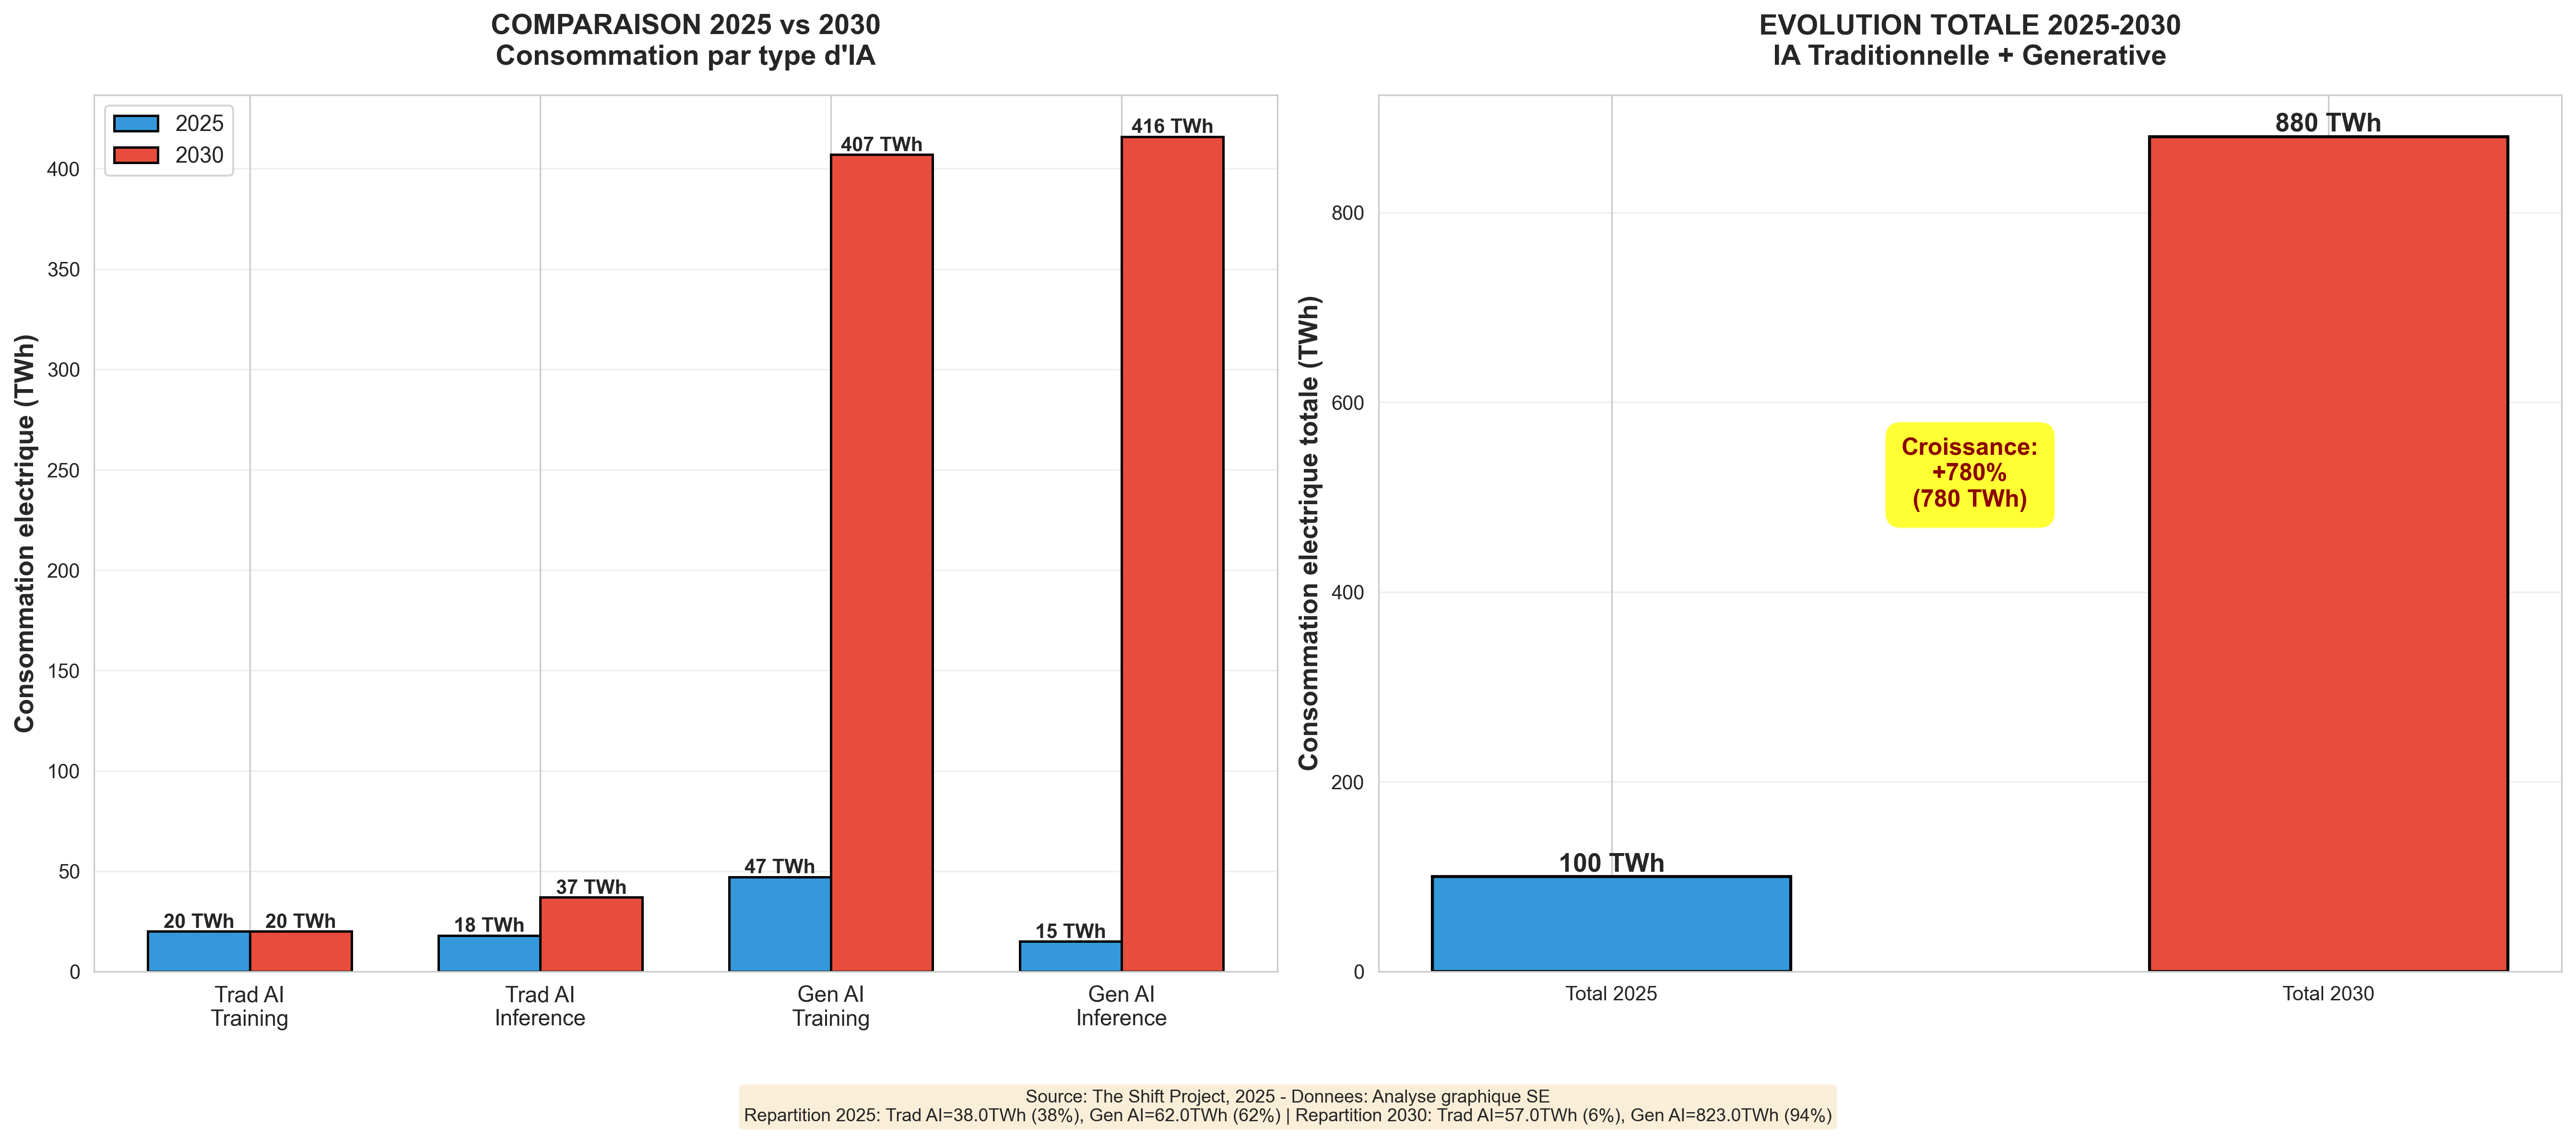

Graphique 1.5 cree - Comparaison 2025 (100.0 TWh) vs 2030 (880.0 TWh) : +780%
  2025: Trad AI=38.0 TWh, Gen AI=62.0 TWh
  2030: Trad AI=57.0 TWh, Gen AI=823.0 TWh


In [19]:
# Extraire les valeurs 2030 (colonne 11) du meme tableau
trad_ai_training_2030 = df_ia_se.iloc[2, 11]  # 20 TWh en 2030
trad_ai_inference_2030 = df_ia_se.iloc[3, 11]  # 37 TWh en 2030
gen_ai_training_2030 = df_ia_se.iloc[5, 11]    # 407 TWh en 2030
gen_ai_inference_2030 = df_ia_se.iloc[6, 11]   # 416 TWh en 2030

# Preparer les donnees pour le graphique de comparaison
categories_comp = ['Trad AI\nTraining', 'Trad AI\nInference', 'Gen AI\nTraining', 'Gen AI\nInference']
valeurs_2025 = [trad_ai_training, trad_ai_inference, gen_ai_training, gen_ai_inference]
valeurs_2030 = [trad_ai_training_2030, trad_ai_inference_2030, gen_ai_training_2030, gen_ai_inference_2030]

# Total
total_2025 = sum(valeurs_2025)
total_2030 = sum(valeurs_2030)

# Creation du graphique de comparaison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Graphique 1: Barres groupees
x = np.arange(len(categories_comp))
width = 0.35

bars1 = ax1.bar(x - width/2, valeurs_2025, width, label='2025',
                color='#3498db', edgecolor='black', linewidth=1.2)
bars2 = ax1.bar(x + width/2, valeurs_2030, width, label='2030',
                color='#e74c3c', edgecolor='black', linewidth=1.2)

# Ajouter les valeurs sur les barres
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)} TWh',
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# Calculer et afficher le taux de croissance
'''for i in range(len(categories_comp)):
    croissance = ((valeurs_2030[i] - valeurs_2025[i]) / valeurs_2025[i]) * 100
    mid_x = x[i]
    max_height = max(valeurs_2025[i], valeurs_2030[i])
    ax1.annotate(f'+{croissance:.0f}%',
                xy=(mid_x, max_height * 1.1),
                fontsize=10, fontweight='bold', color='darkred',
                ha='center',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))'''

ax1.set_ylabel('Consommation electrique (TWh)', fontsize=13, fontweight='bold')
ax1.set_title('COMPARAISON 2025 vs 2030\nConsommation par type d\'IA',
              fontsize=14, fontweight='bold', pad=15)
ax1.set_xticks(x)
ax1.set_xticklabels(categories_comp, fontsize=11)
ax1.legend(fontsize=11, loc='upper left')
ax1.grid(axis='y', alpha=0.3)

# Graphique 2: Totaux avec explosion
categories_total = ['Total 2025', 'Total 2030']
valeurs_total = [total_2025, total_2030]
colors_total = ['#3498db', '#e74c3c']

bars_total = ax2.bar(categories_total, valeurs_total, color=colors_total,
                     edgecolor='black', linewidth=1.5, width=0.5)

for bar in bars_total:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)} TWh',
            ha='center', va='bottom', fontsize=13, fontweight='bold')

# Taux de croissance global
croissance_globale = ((total_2030 - total_2025) / total_2025) * 100
ax2.annotate(f'Croissance:\n+{croissance_globale:.0f}%\n({total_2030 - total_2025:.0f} TWh)',
            xy=(0.5, (total_2025 + total_2030) / 2),
            fontsize=12, fontweight='bold', color='darkred',
            ha='center',
            bbox=dict(boxstyle='round,pad=0.7', facecolor='yellow', alpha=0.8))

ax2.set_ylabel('Consommation electrique totale (TWh)', fontsize=13, fontweight='bold')
ax2.set_title('EVOLUTION TOTALE 2025-2030\nIA Traditionnelle + Generative',
              fontsize=14, fontweight='bold', pad=15)
ax2.grid(axis='y', alpha=0.3)

# Ajouter une note globale
fig.text(0.5, 0.02, 'Source: The Shift Project, 2025 - Donnees: Analyse graphique SE\n' +
         f'Repartition 2025: Trad AI={sum(valeurs_2025[:2])}TWh ({sum(valeurs_2025[:2])/total_2025*100:.0f}%), Gen AI={sum(valeurs_2025[2:])}TWh ({sum(valeurs_2025[2:])/total_2025*100:.0f}%) | ' +
         f'Repartition 2030: Trad AI={sum(valeurs_2030[:2])}TWh ({sum(valeurs_2030[:2])/total_2030*100:.0f}%), Gen AI={sum(valeurs_2030[2:])}TWh ({sum(valeurs_2030[2:])/total_2030*100:.0f}%)',
         ha='center', fontsize=9,
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.subplots_adjust(bottom=0.15)
plt.savefig(output_dir / '01b_comparaison_2025_vs_2030.png', dpi=300, bbox_inches='tight')
plt.show()

print(f'Graphique 1.5 cree - Comparaison 2025 ({total_2025} TWh) vs 2030 ({total_2030} TWh) : +{croissance_globale:.0f}%')
print(f'  2025: Trad AI={sum(valeurs_2025[:2])} TWh, Gen AI={sum(valeurs_2025[2:])} TWh')
print(f'  2030: Trad AI={sum(valeurs_2030[:2])} TWh, Gen AI={sum(valeurs_2030[2:])} TWh')

---

## Graphique 2: Evolution Historique 2015-2024

**Donnees:** Feuille "1 - Taux de croissance hist" du fichier Centres de Donnees

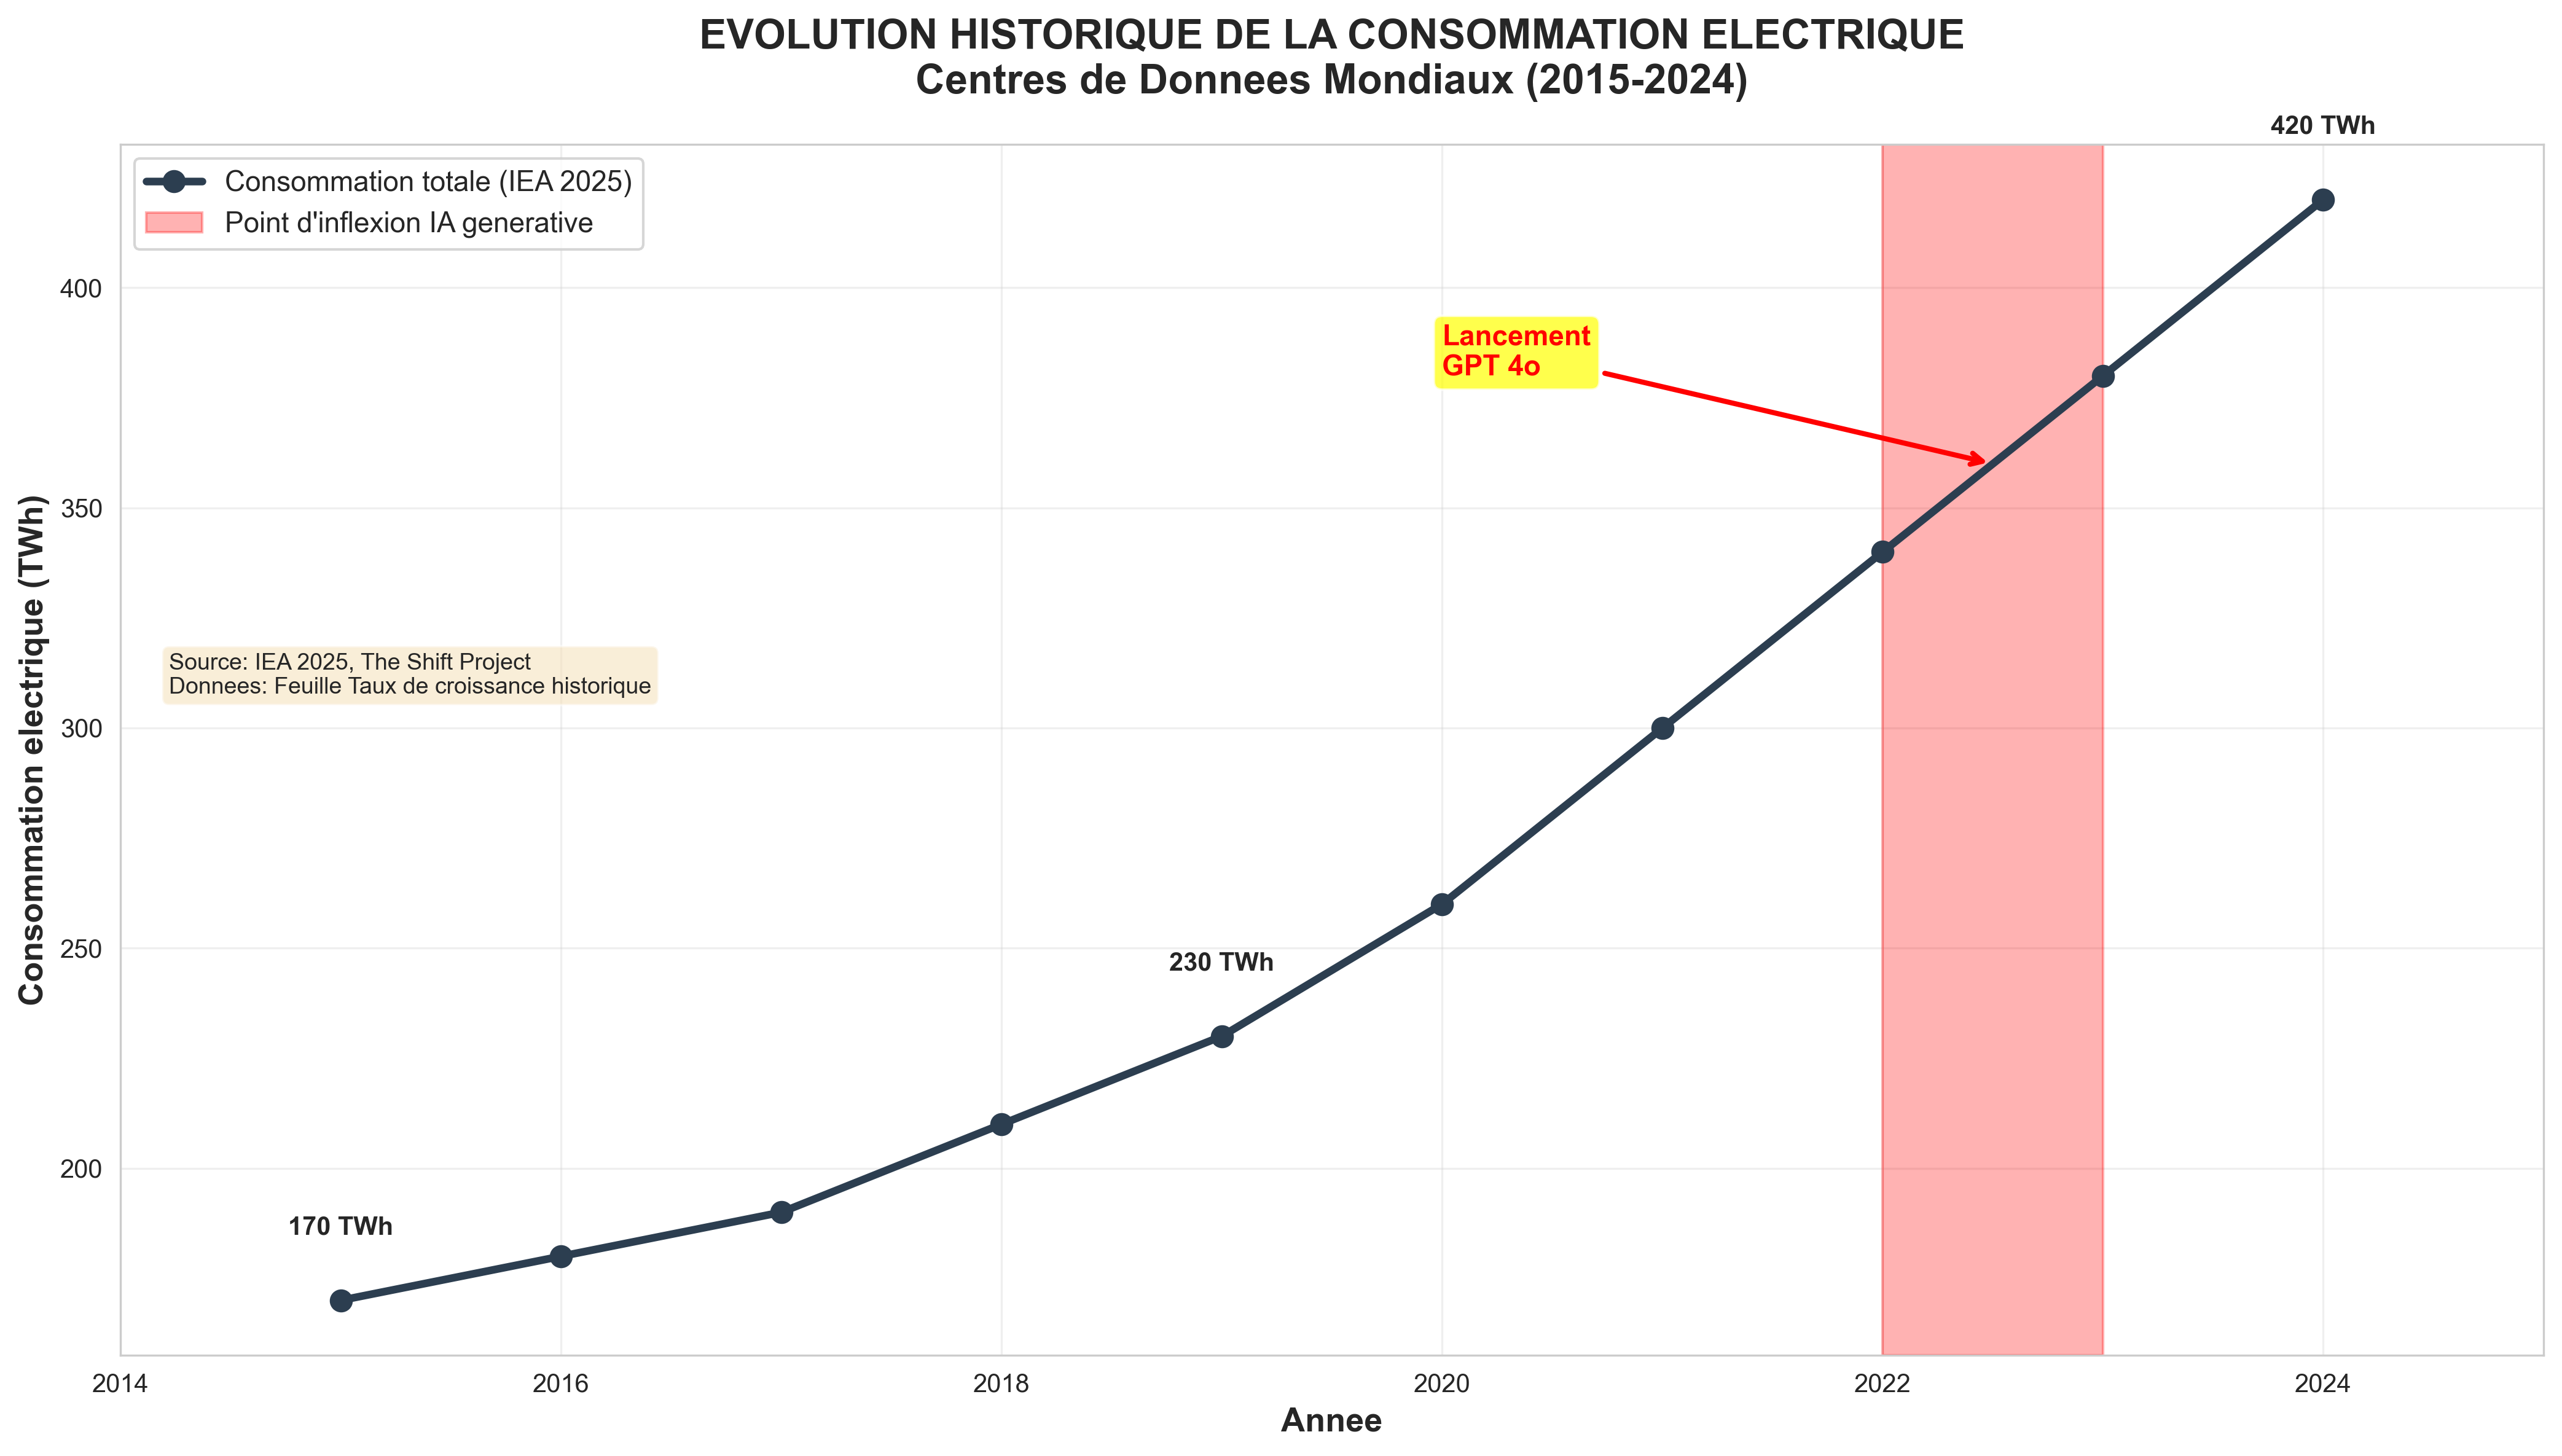

Graphique 2 cree - Annees: 2015-2024, Valeurs: 170-420 TWh


In [4]:
# Charger les donnees historiques
df_hist = pd.read_excel(file_cdc, sheet_name='1 - Taux de croissance hist', header=None)

# Ligne 2 contient les annees (colonnes 6 a 21 = 2015 a 2024)
# Ligne 3 contient la consommation en TWh
years = [int(df_hist.iloc[1, i]) for i in range(12, 22)]  # 2015-2024
consumption = [float(df_hist.iloc[2, i]) for i in range(12, 22)]  # TWh

fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(years, consumption, marker='o', linewidth=3, markersize=8,
        color='#2c3e50', label='Consommation totale (IEA 2025)')

ax.axvspan(2022, 2023, alpha=0.3, color='red',
           label="Point d'inflexion IA generative")

ax.annotate('Lancement\nGPT 4o', xy=(2022.5, 360), xytext=(2020, 380),
            arrowprops=dict(arrowstyle='->', color='red', lw=2),
            fontsize=11, fontweight='bold', color='red',
            bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

for i in [0, 4, 9]:
    ax.text(years[i], consumption[i] + 15, f'{int(consumption[i])} TWh',
            ha='center', fontsize=10, fontweight='bold')

ax.set_xlabel('Annee', fontsize=13, fontweight='bold')
ax.set_ylabel('Consommation electrique (TWh)', fontsize=13, fontweight='bold')
ax.set_title('EVOLUTION HISTORIQUE DE LA CONSOMMATION ELECTRIQUE\nCentres de Donnees Mondiaux (2015-2024)',
             fontsize=16, fontweight='bold', pad=20)
ax.legend(fontsize=11, loc='upper left')
ax.grid(True, alpha=0.3)
ax.set_xlim(2014, 2025)

ax.text(0.02, 0.58, 'Source: IEA 2025, The Shift Project\nDonnees: Feuille Taux de croissance historique',
        transform=ax.transAxes, fontsize=9, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig(output_dir / '02_evolution.png', dpi=300, bbox_inches='tight')
plt.show()

print(f'Graphique 2 cree - Annees: {years[0]}-{years[-1]}, Valeurs: {int(consumption[0])}-{int(consumption[-1])} TWh')

---

## Graphique 3: Projections 3 Scenarios avec ENERGY WALL

**Donnees:** Feuille "3 - Conso elec TWh monde" du fichier Centres de Donnees

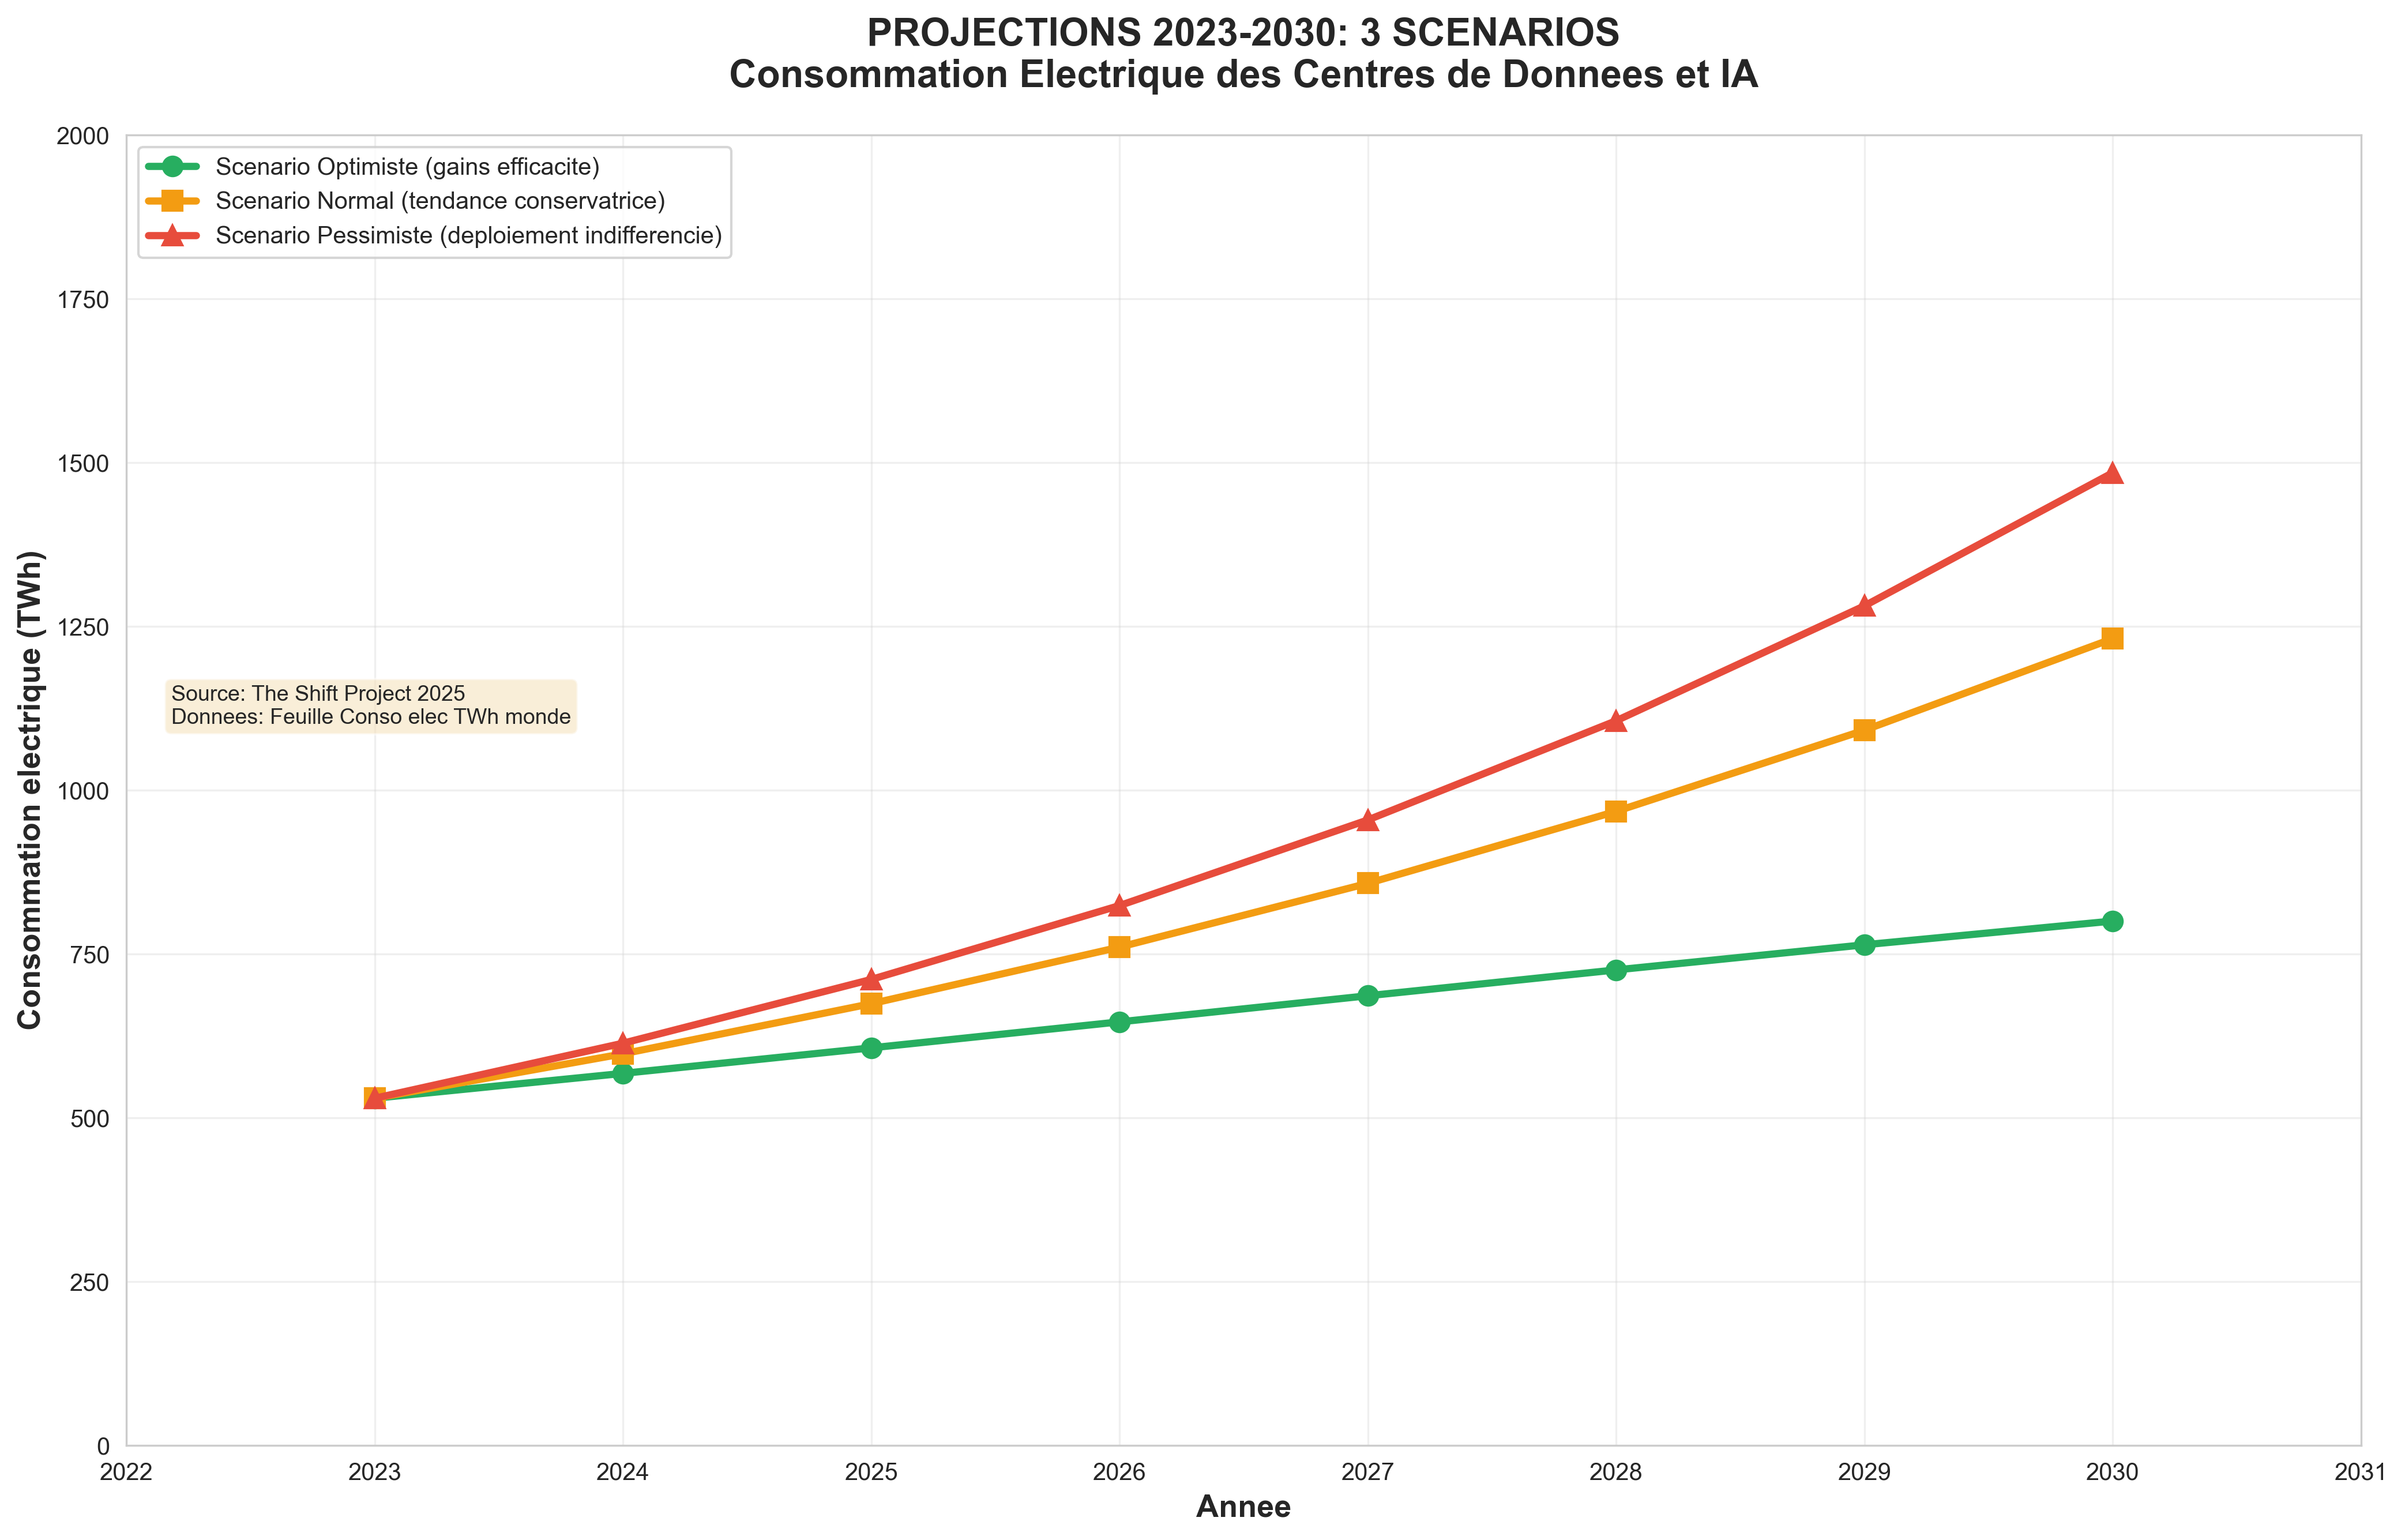

Graphique 3 cree - 2030: Optimiste=800, Normal=1231, Pessimiste=1484 TWh


In [15]:
# Charger les donnees de projection
df_proj = pd.read_excel(file_cdc, sheet_name='3 - Conso élec TWh monde', header=None)

# Ligne 2: Annees (colonnes 2-9 = 2023-2030)
# Ligne 3: Scenario exploratoire (pessimiste)
# Ligne 4: Tendance conservatrice (normal/optimiste)
years_proj = [int(df_proj.iloc[1, i]) for i in range(2, 10)]  # 2023-2030
scenario_pessimiste = [float(df_proj.iloc[8, i]) for i in range(2, 10)]  # Scenario exploratoire
scenario_normal = [float(df_proj.iloc[9, i]) for i in range(2, 10)]  # Tendance conservatrice

# Scenario optimiste (estimation a partir de la tendance normale avec gains efficacite -30%)
scenario_optimiste = [scenario_normal[i] * (1 - 0.05*i) for i in range(len(scenario_normal))]

fig, ax = plt.subplots(figsize=(14, 9))

ax.plot(years_proj, scenario_optimiste, marker='o', linewidth=3, markersize=8,
        color='#27ae60', label='Scenario Optimiste (gains efficacite)', linestyle='-')
ax.plot(years_proj, scenario_normal, marker='s', linewidth=3, markersize=8,
        color='#f39c12', label='Scenario Normal (tendance conservatrice)', linestyle='-')
ax.plot(years_proj, scenario_pessimiste, marker='^', linewidth=3, markersize=8,
        color='#e74c3c', label='Scenario Pessimiste (deploiement indifferencie)', linestyle='-')

ax.set_xlabel('Annee', fontsize=13, fontweight='bold')
ax.set_ylabel('Consommation electrique (TWh)', fontsize=13, fontweight='bold')
ax.set_title('PROJECTIONS 2023-2030: 3 SCENARIOS\nConsommation Electrique des Centres de Donnees et IA',
             fontsize=16, fontweight='bold', pad=20)
ax.legend(fontsize=10, loc='upper left')
ax.grid(True, alpha=0.3)
ax.set_xlim(2022, 2031)
ax.set_ylim(0, 2000)

ax.text(0.02, 0.58, 'Source: The Shift Project 2025\nDonnees: Feuille Conso elec TWh monde',
        transform=ax.transAxes, fontsize=9, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig(output_dir / '03_projections_energy_wall.png', dpi=300, bbox_inches='tight')
plt.show()

print(f'Graphique 3 cree - 2030: Optimiste={int(scenario_optimiste[-1])}, Normal={int(scenario_normal[-1])}, Pessimiste={int(scenario_pessimiste[-1])} TWh')


---

## Graphique 4: Emissions CO2 par Scenario

**Donnees:** Feuille "4 - Emissions GES scenarios" du fichier Centres de Donnees

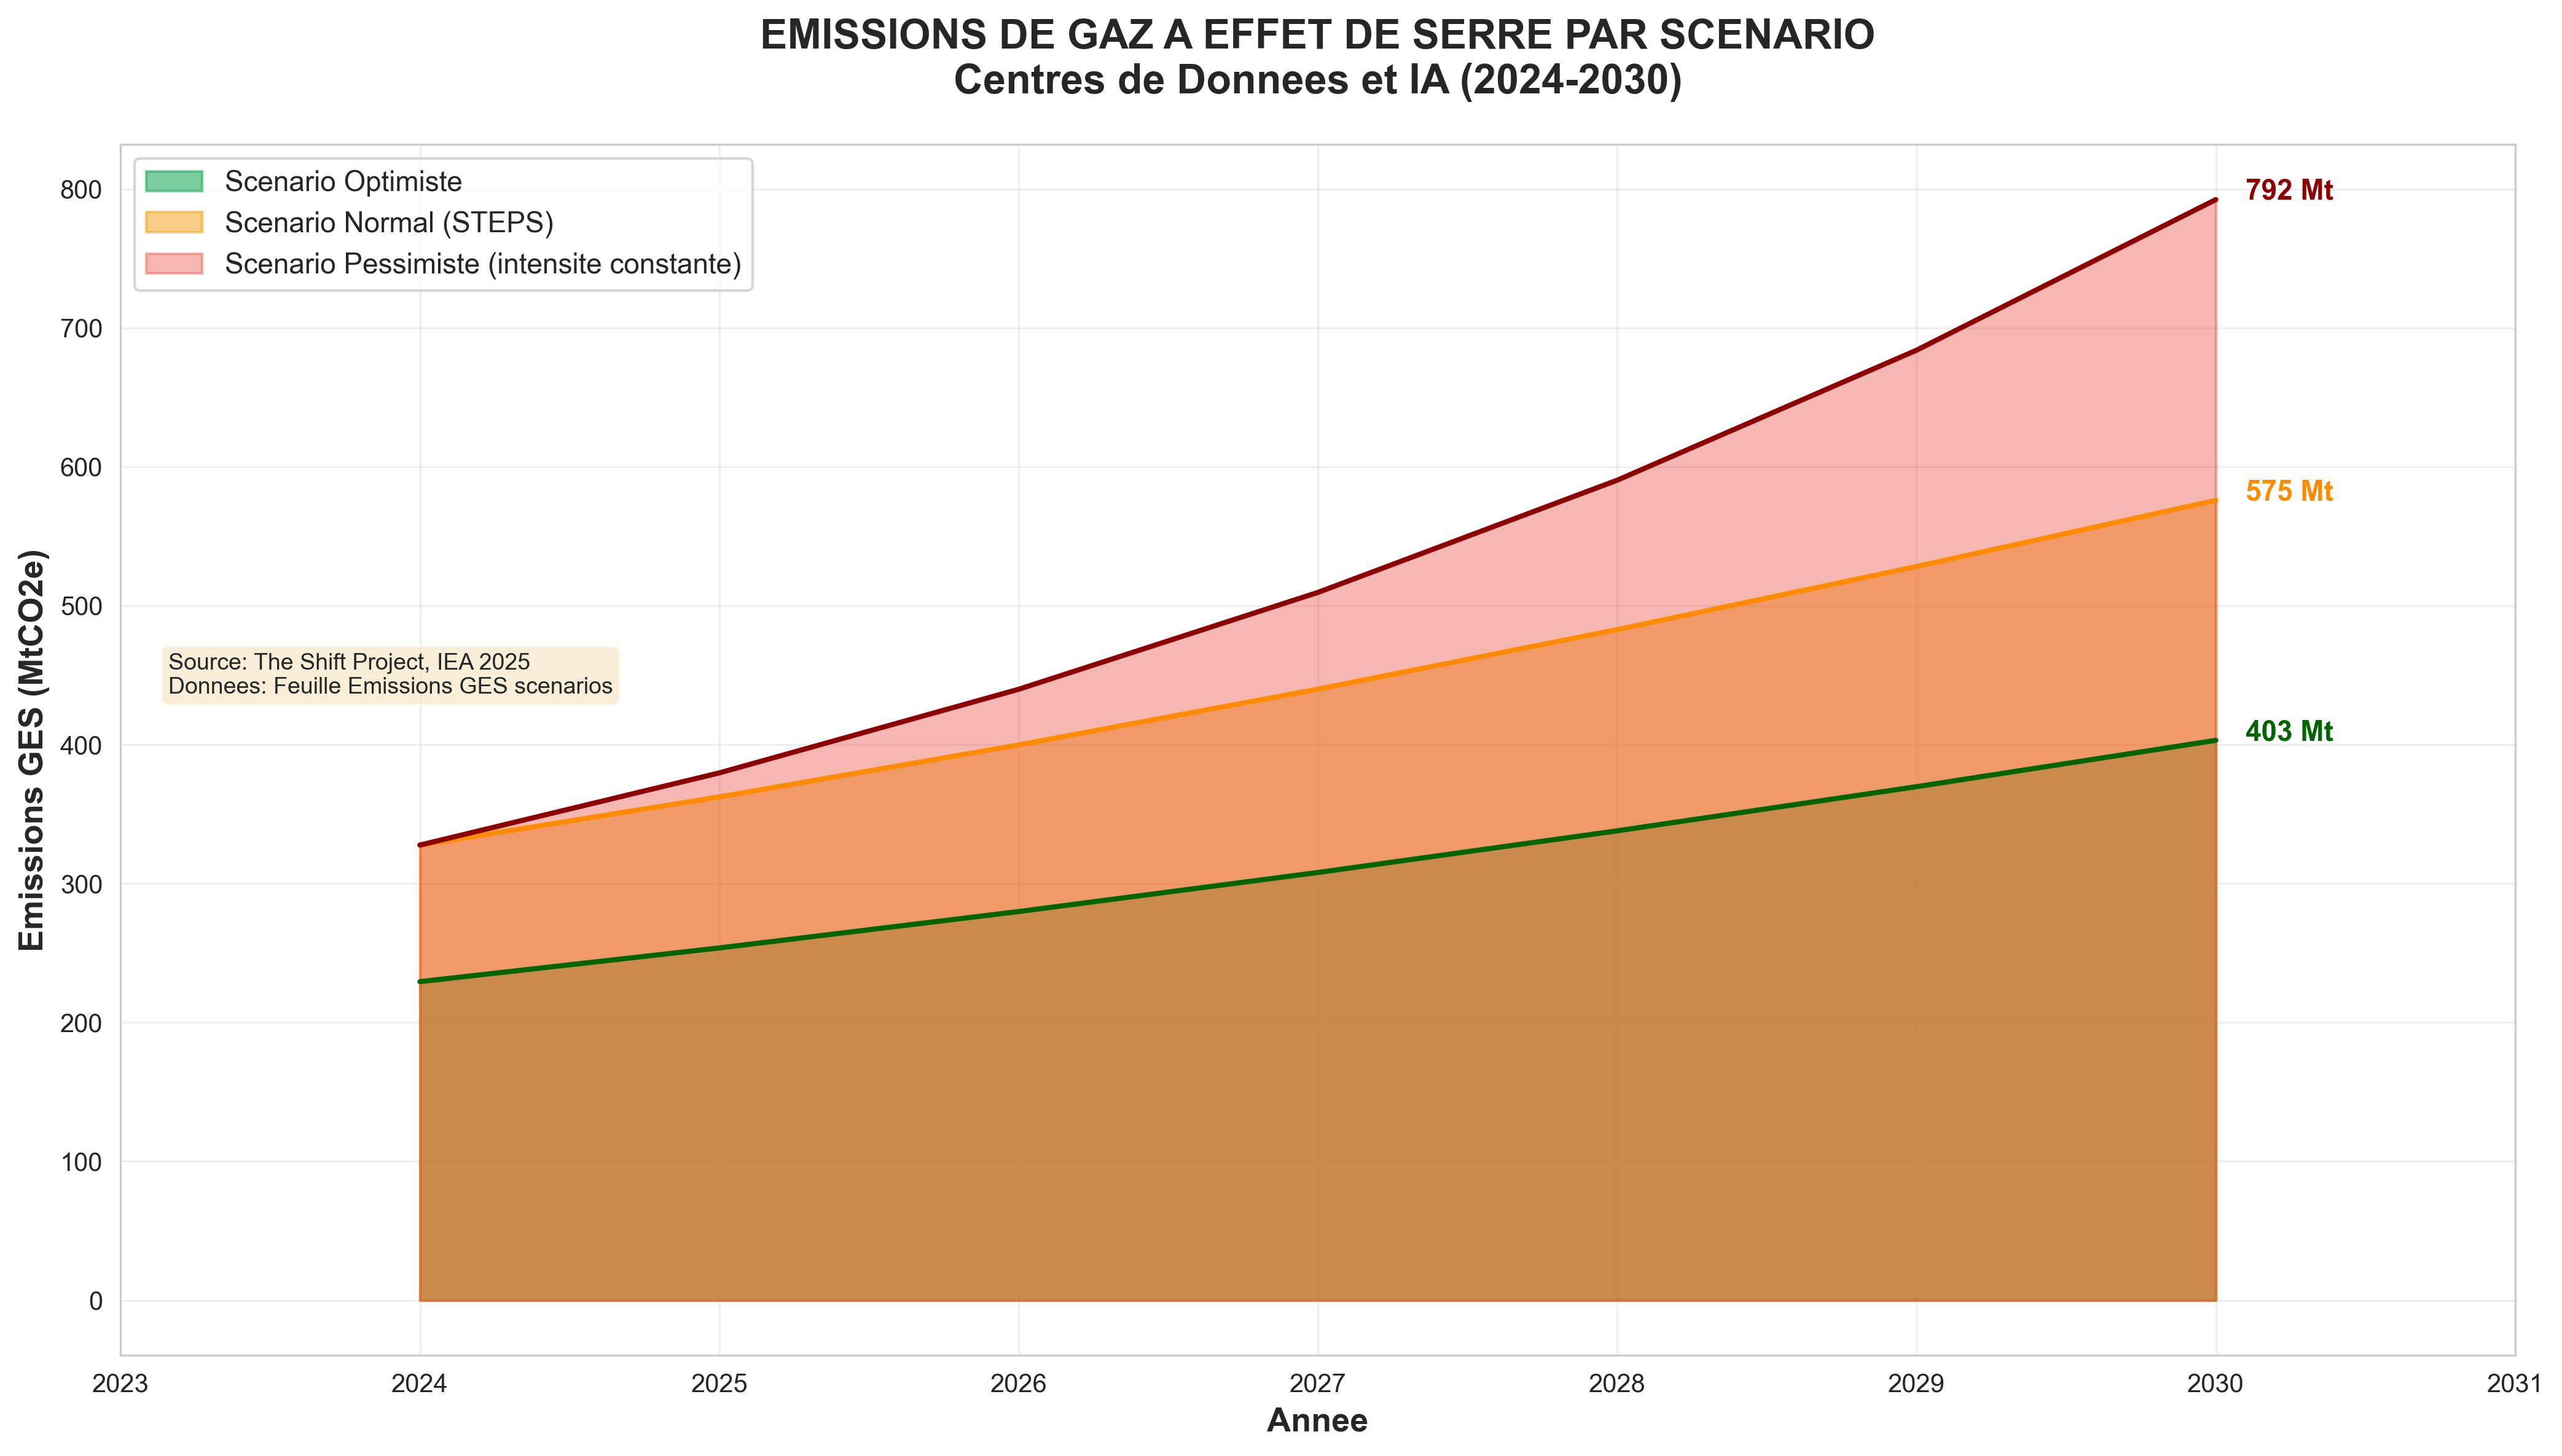

Graphique 4 cree - 2030 Emissions: Optimiste=403, Normal=575, Pessimiste=792 MtCO2e


In [6]:
# Charger les donnees d'emissions
df_ges = pd.read_excel(file_cdc, sheet_name='4 - Emissions GES scénarios', header=None)

# Ligne 3: Annees 2020-2035 (colonnes 2-15)
# Ligne 7: Emissions GES scenario STEPS (normal)
# Ligne 11: Emissions GES scenario intensite carbone constante (pessimiste)
years_ges = [2024, 2025, 2026, 2027, 2028, 2029, 2030]

# Extraire les emissions pour 2024-2030 (colonnes 5-11)
emissions_normal = [float(df_ges.iloc[6, i]) for i in range(5, 12)]  # MtCO2e
emissions_pessimiste = [float(df_ges.iloc[10, i]) for i in range(5, 12)]  # MtCO2e

# Scenario optimiste (30% de reduction grace aux energies renouvelables)
emissions_optimiste = [e * 0.7 for e in emissions_normal]

fig, ax = plt.subplots(figsize=(14, 8))

ax.fill_between(years_ges, 0, emissions_optimiste, alpha=0.6,
                color='#27ae60', label='Scenario Optimiste')
ax.fill_between(years_ges, 0, emissions_normal, alpha=0.5,
                color='#f39c12', label='Scenario Normal (STEPS)')
ax.fill_between(years_ges, 0, emissions_pessimiste, alpha=0.4,
                color='#e74c3c', label='Scenario Pessimiste (intensite constante)')

ax.plot(years_ges, emissions_optimiste, linewidth=2, color='darkgreen')
ax.plot(years_ges, emissions_normal, linewidth=2, color='darkorange')
ax.plot(years_ges, emissions_pessimiste, linewidth=2, color='darkred')

ax.text(2030.1, emissions_optimiste[-1], f'{int(emissions_optimiste[-1])} Mt',
        fontsize=11, fontweight='bold', color='darkgreen')
ax.text(2030.1, emissions_normal[-1], f'{int(emissions_normal[-1])} Mt',
        fontsize=11, fontweight='bold', color='darkorange')
ax.text(2030.1, emissions_pessimiste[-1], f'{int(emissions_pessimiste[-1])} Mt',
        fontsize=11, fontweight='bold', color='darkred')

ax.set_xlabel('Annee', fontsize=13, fontweight='bold')
ax.set_ylabel('Emissions GES (MtCO2e)', fontsize=13, fontweight='bold')
ax.set_title('EMISSIONS DE GAZ A EFFET DE SERRE PAR SCENARIO\nCentres de Donnees et IA (2024-2030)',
             fontsize=16, fontweight='bold', pad=20)
ax.legend(fontsize=11, loc='upper left')
ax.grid(True, alpha=0.3)
ax.set_xlim(2023, 2031)

ax.text(0.02, 0.58, "Source: The Shift Project, IEA 2025\nDonnees: Feuille Emissions GES scenarios",
        transform=ax.transAxes, fontsize=9, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig(output_dir / '04_emissions_co2.png', dpi=300, bbox_inches='tight')
plt.show()

print(f'Graphique 4 cree - 2030 Emissions: Optimiste={int(emissions_optimiste[-1])}, Normal={int(emissions_normal[-1])}, Pessimiste={int(emissions_pessimiste[-1])} MtCO2e')

---

## Graphique 5: Situation France

**Donnees:** Feuilles scenarios France du fichier France 2025

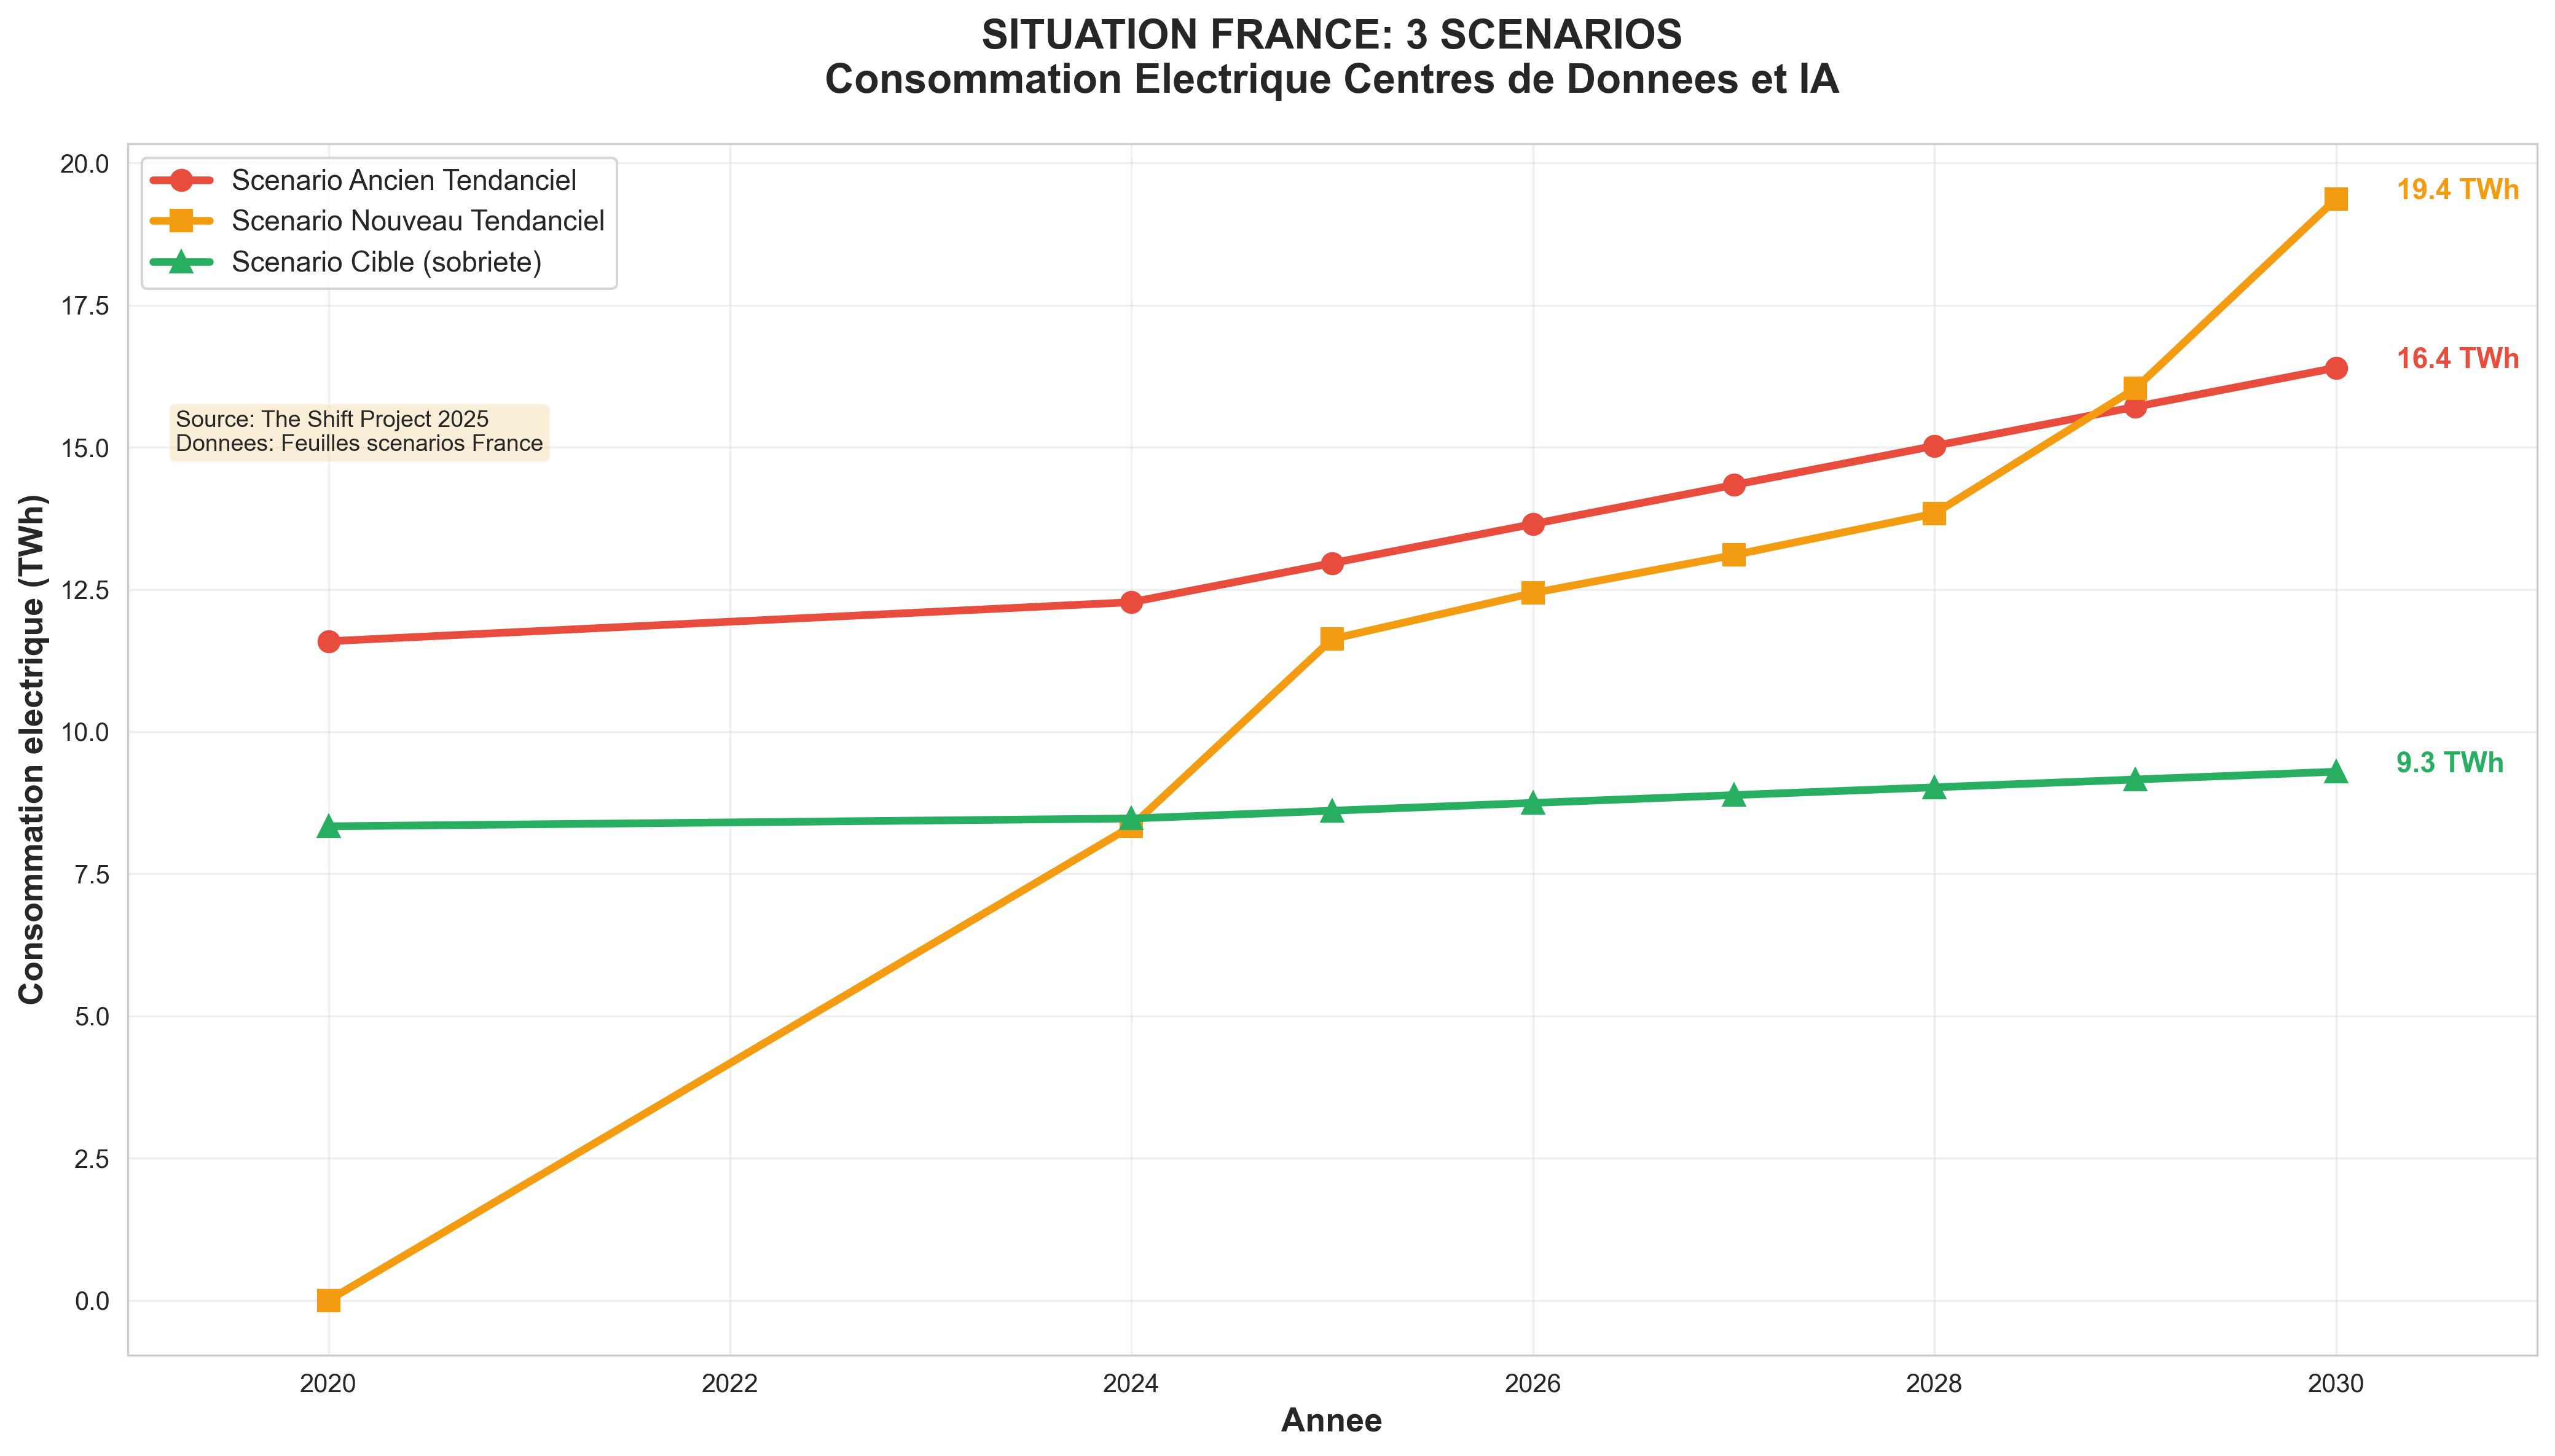

Graphique 5 cree - 2030 France: Ancien=16.4, Nouveau=19.4, Cible=9.3 TWh


In [9]:
# Charger les scenarios France
df_france_ancien = pd.read_excel(file_france, sheet_name='Sc ancien tendanciel', header=None)
df_france_nouveau = pd.read_excel(file_france, sheet_name='Sc nouveau tendanciel', header=None)
df_france_cible = pd.read_excel(file_france, sheet_name='Sc cible', header=None)

# Annees
years_france = [2020, 2024, 2025, 2026, 2027, 2028, 2029, 2030]

# Scenario ancien tendanciel: ligne 8, colonnes 2-9 (2020, 2030)
val_ancien_2020 = float(df_france_ancien.iloc[8, 2])  # 11.59 TWh
val_ancien_2030 = float(df_france_ancien.iloc[8, 9])  # 16.40 TWh
# Interpolation lineaire
sc_ancien = np.linspace(val_ancien_2020, val_ancien_2030, len(years_france))

# Scenario nouveau tendanciel: ligne 8, colonnes 1-8
sc_nouveau = pd.to_numeric(df_france_nouveau.iloc[8, 1:9], errors='coerce').tolist()  # Convert to numeric and handle non-numeric values
sc_nouveau = [val if not pd.isna(val) else 0 for val in sc_nouveau]  # Replace NaN with 0 or handle as needed

# Scenario cible: ligne 8, colonnes 2 et 9 (2020, 2030)
val_cible_2020 = float(df_france_cible.iloc[8, 2])  # 8.34 TWh
val_cible_2030 = float(df_france_cible.iloc[8, 9])  # 9.30 TWh
# Interpolation lineaire
sc_cible = np.linspace(val_cible_2020, val_cible_2030, len(years_france))

fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(years_france, sc_ancien, marker='o', linewidth=3,
        markersize=8, color='#e74c3c', label='Scenario Ancien Tendanciel')
ax.plot(years_france, sc_nouveau, marker='s', linewidth=3,
        markersize=8, color='#f39c12', label='Scenario Nouveau Tendanciel')
ax.plot(years_france, sc_cible, marker='^', linewidth=3, markersize=8,
        color='#27ae60', label='Scenario Cible (sobriete)')

for scenario, color in [(sc_ancien, '#e74c3c'),
                        (sc_nouveau, '#f39c12'),
                        (sc_cible, '#27ae60')]:
    ax.text(2030.3, scenario[-1], f'{scenario[-1]:.1f} TWh',
            fontsize=11, fontweight='bold', color=color)

ax.set_xlabel('Annee', fontsize=13, fontweight='bold')
ax.set_ylabel('Consommation electrique (TWh)', fontsize=13, fontweight='bold')
ax.set_title('SITUATION FRANCE: 3 SCENARIOS\nConsommation Electrique Centres de Donnees et IA',
             fontsize=16, fontweight='bold', pad=20)
ax.legend(fontsize=11, loc='upper left')
ax.grid(True, alpha=0.3)
ax.set_xlim(2019, 2031)

ax.text(0.02, 0.78, 'Source: The Shift Project 2025\nDonnees: Feuilles scenarios France',
        transform=ax.transAxes, fontsize=9, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig(output_dir / '05_france.png', dpi=300, bbox_inches='tight')
plt.show()

print(f'Graphique 5 cree - 2030 France: Ancien={sc_ancien[-1]:.1f}, Nouveau={sc_nouveau[-1]:.1f}, Cible={sc_cible[-1]:.1f} TWh')

---

## Graphique 6: Consommation d'Eau

**Calcul:** 1.8L d'eau par kWh (donnees historiques et projections)

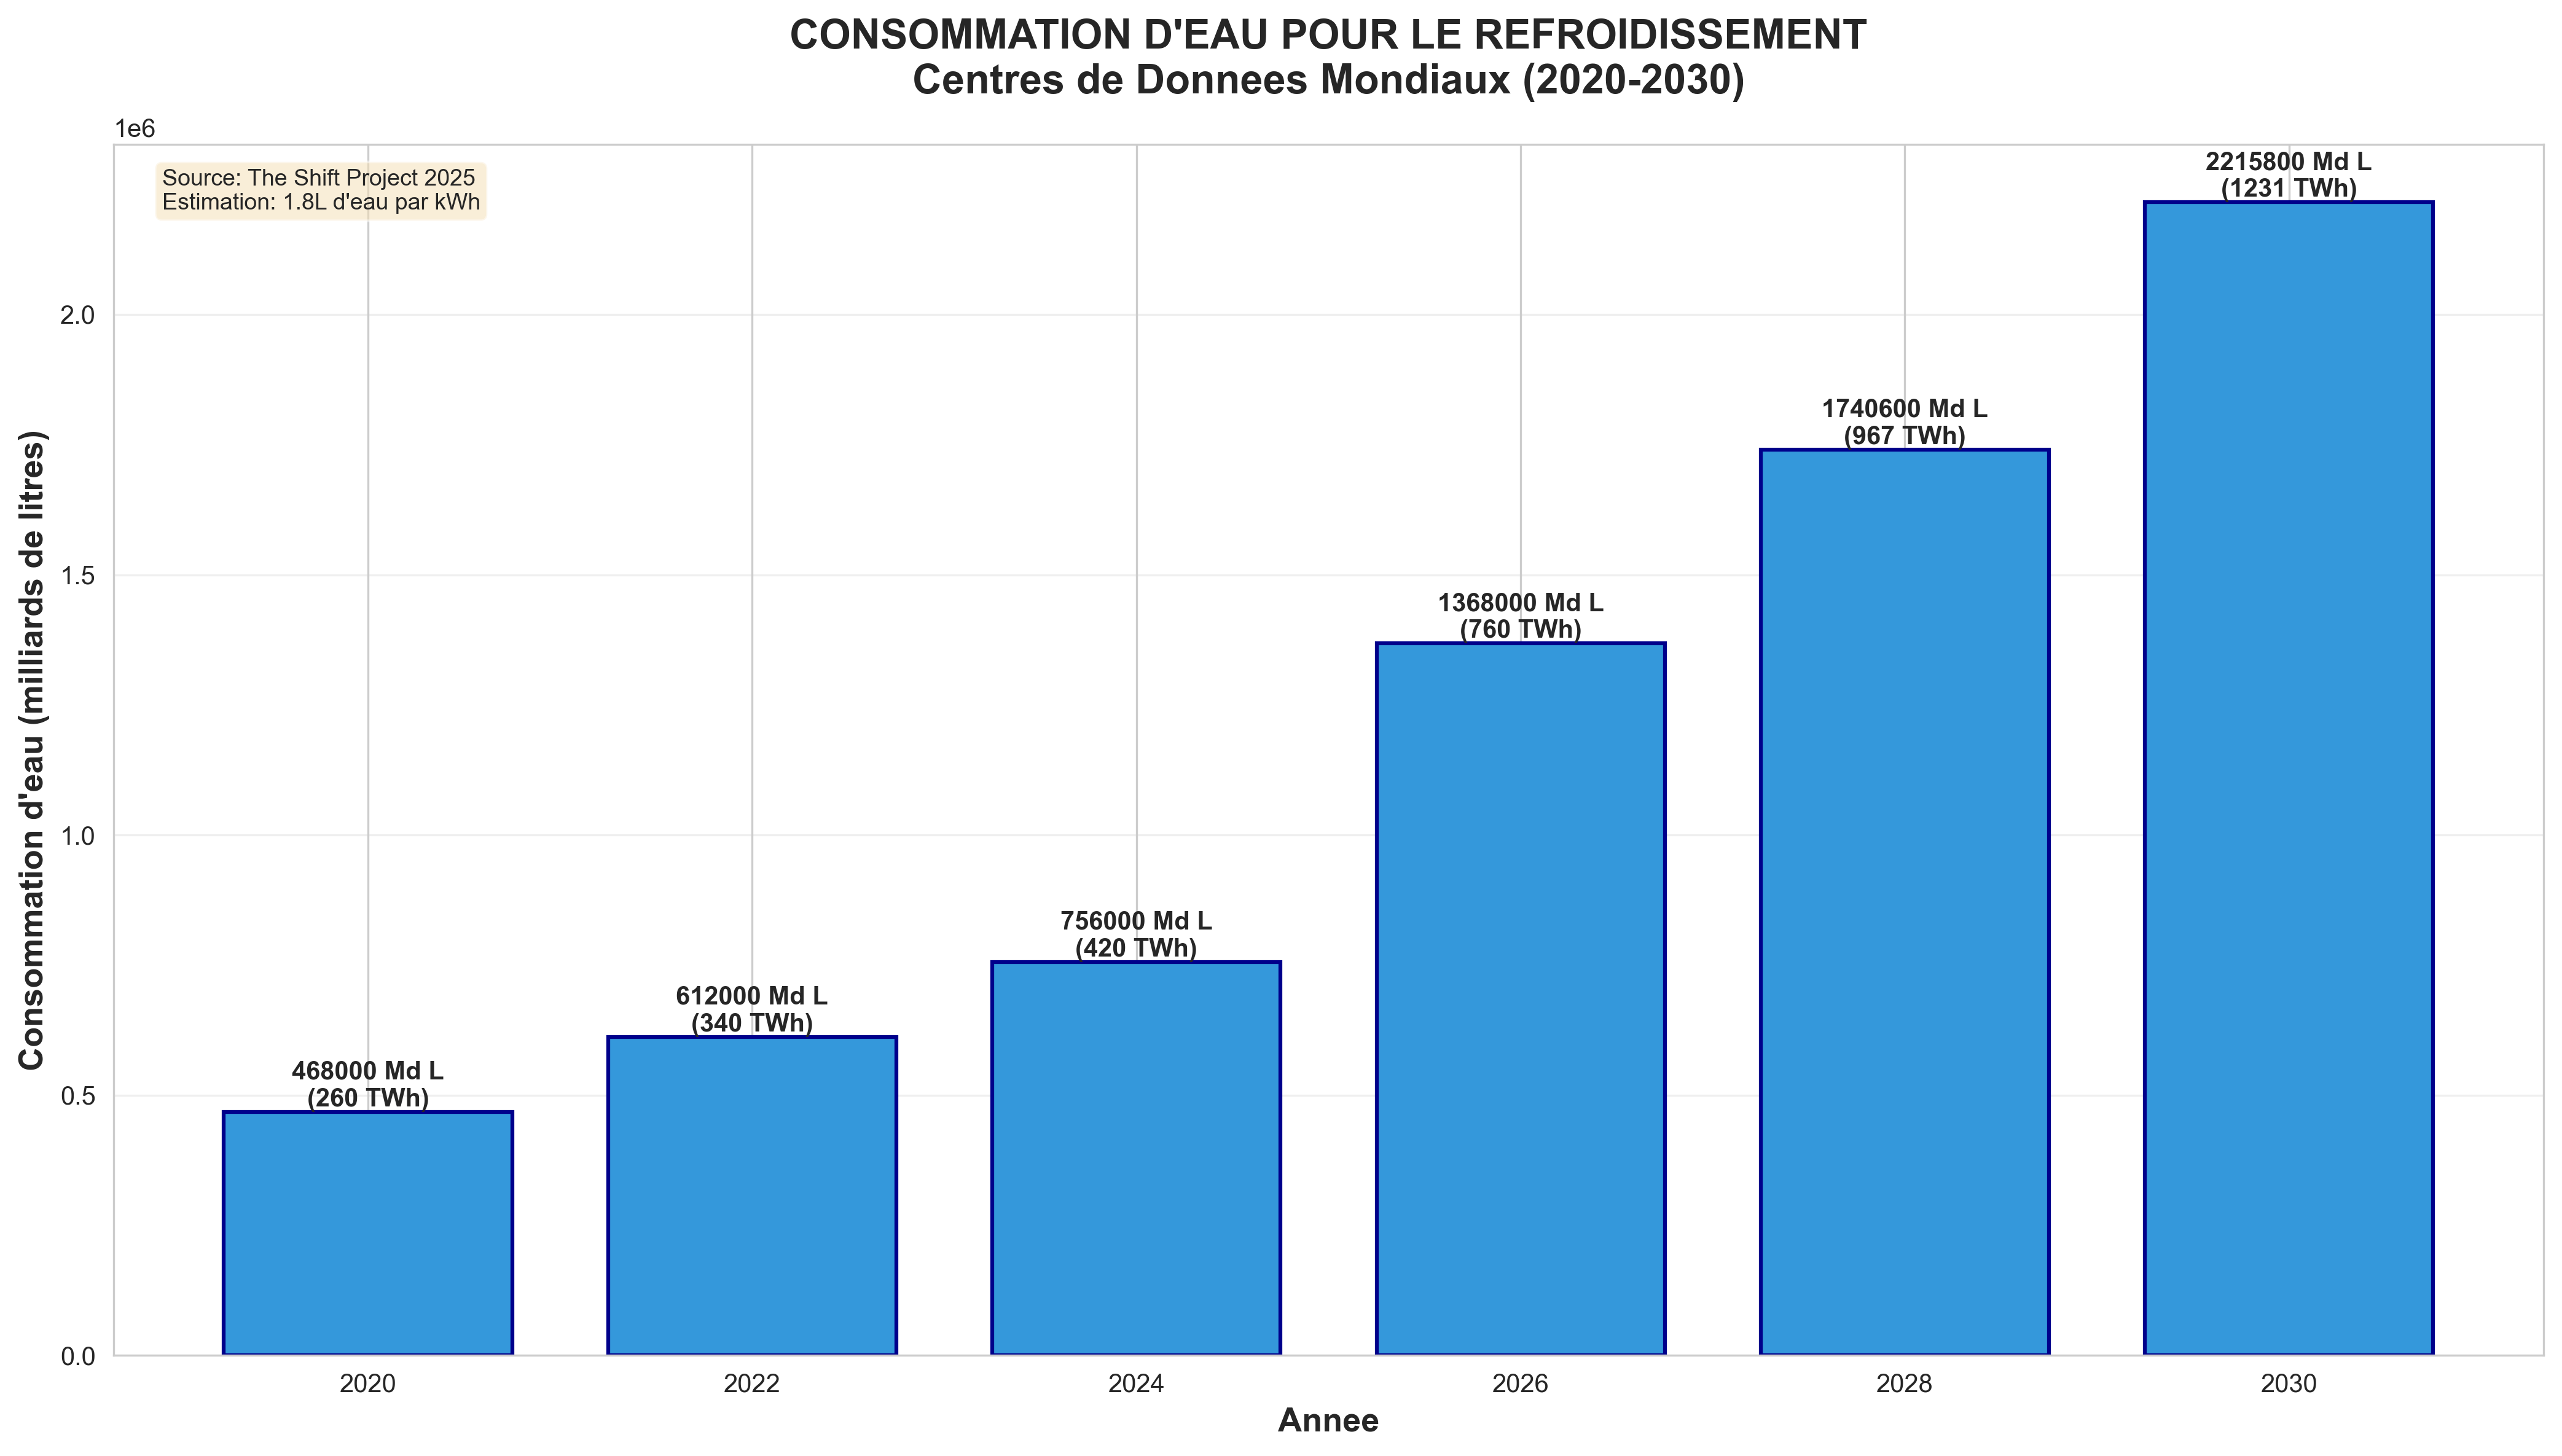

Graphique 6 cree - 2030: 2215800 milliards de litres


In [8]:
# Utiliser les donnees historiques et projections du graph 2 et 3
years_eau = [2020, 2022, 2024, 2026, 2028, 2030]

# Consommation electrique correspondante (TWh)
consumption_twh = [260, 340, 420, int(scenario_normal[3]), int(scenario_normal[5]), int(scenario_normal[7])]

# Calcul: 1.8L par kWh
eau_milliards_litres = [twh * 1_000_000 * 1.8 / 1000 for twh in consumption_twh]

fig, ax = plt.subplots(figsize=(14, 8))

bars = ax.bar(years_eau, eau_milliards_litres, color='#3498db',
              edgecolor='darkblue', linewidth=1.5, width=1.5)

for i, (bar, val) in enumerate(zip(bars, eau_milliards_litres)):
    ax.text(bar.get_x() + bar.get_width()/2., bar.get_height(),
            f'{val:.0f} Md L\n({consumption_twh[i]} TWh)',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

ax.set_xlabel('Annee', fontsize=13, fontweight='bold')
ax.set_ylabel("Consommation d'eau (milliards de litres)", fontsize=13, fontweight='bold')
ax.set_title("CONSOMMATION D'EAU POUR LE REFROIDISSEMENT\nCentres de Donnees Mondiaux (2020-2030)",
             fontsize=16, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3)

ax.text(0.02, 0.98, "Source: The Shift Project 2025\nEstimation: 1.8L d'eau par kWh",
        transform=ax.transAxes, fontsize=9, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig(output_dir / '06_eau.png', dpi=300, bbox_inches='tight')
plt.show()

print(f'Graphique 6 cree - 2030: {eau_milliards_litres[-1]:.0f} milliards de litres')

---

## Graphique 7: Potentiel d'Efficacite Energetique

**Donnees:** Calculs basees sur la consommation actuelle et potentiels d'amelioration

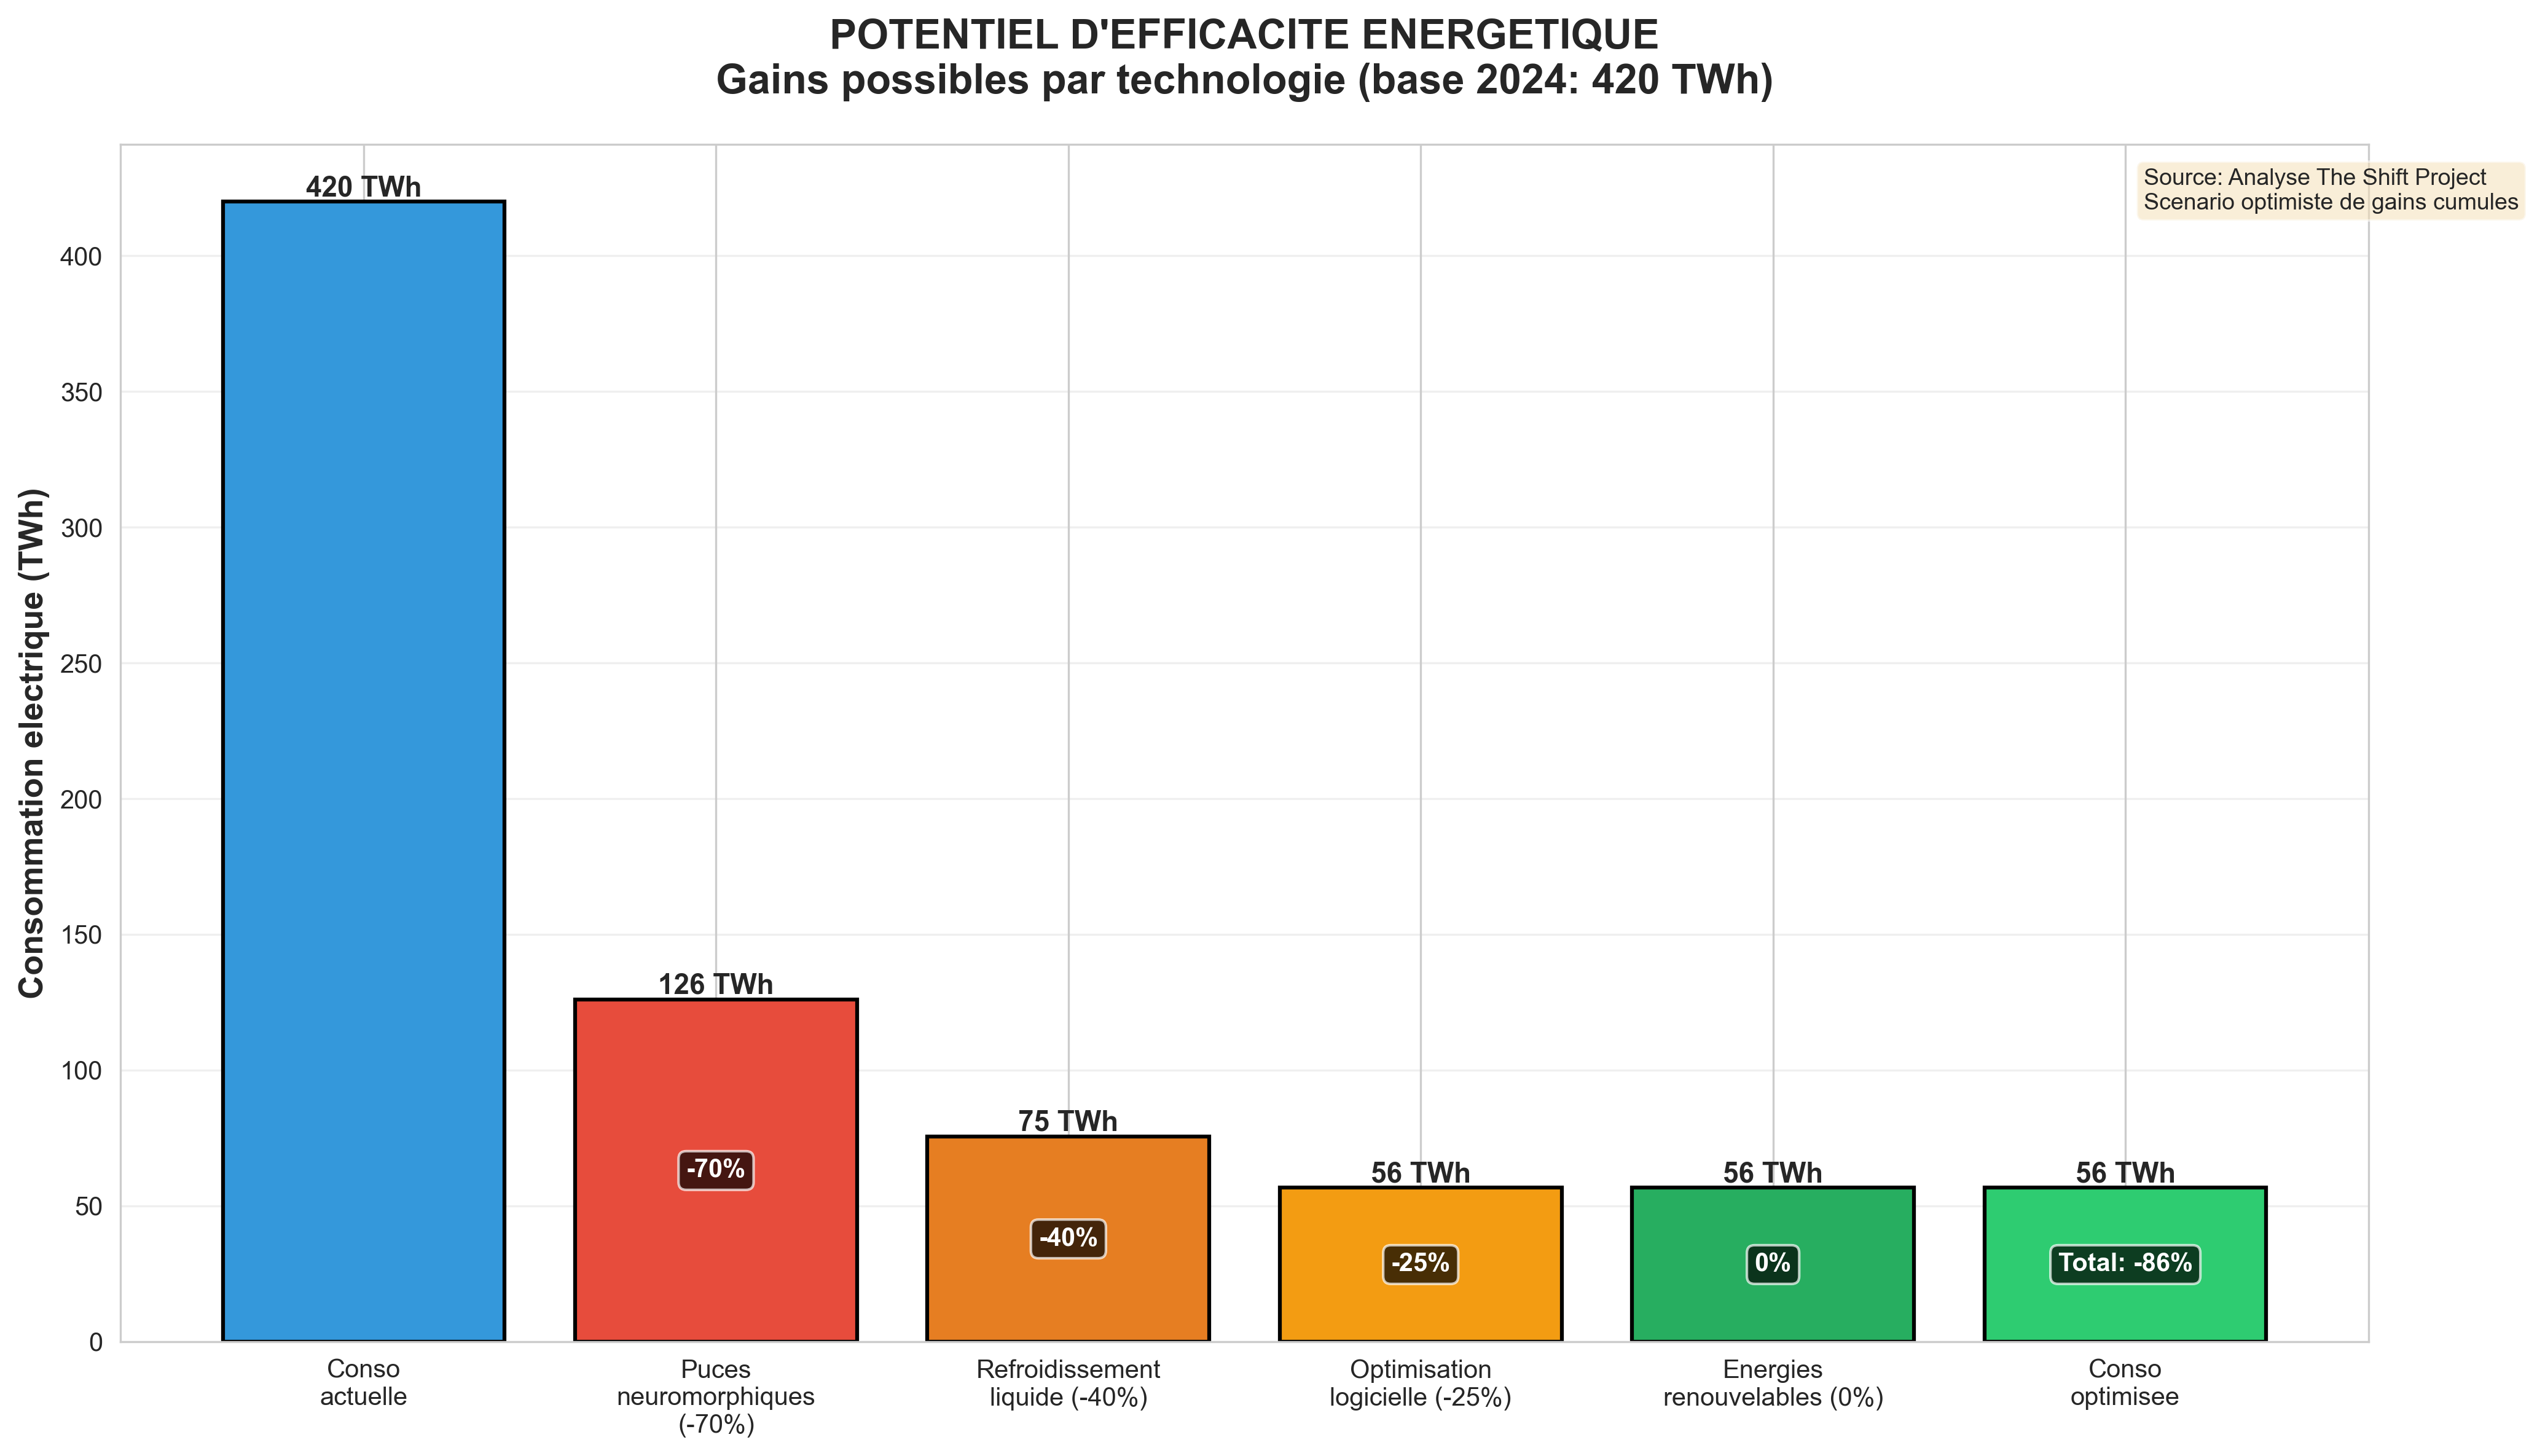

Graphique 8 cree - Reduction totale: 86% (de 420 a 56 TWh)


In [13]:
categories = [
    'Conso\nactuelle',
    'Puces\nneuromorphiques\n(-70%)',
    'Refroidissement\nliquide (-40%)',
    'Optimisation\nlogicielle (-25%)',
    'Energies\nrenouvelables (0%)',
    'Conso\noptimisee'
]

# Utiliser la consommation 2024 reelle
conso_actuelle = 420  # TWh (donnee reelle 2024)
apres_puces = conso_actuelle * 0.3  # -70%
apres_refroid = apres_puces * 0.6  # -40%
apres_soft = apres_refroid * 0.75  # -25%
final = apres_soft

valeurs_waterfall = [conso_actuelle, apres_puces, apres_refroid, apres_soft, apres_soft, final]

fig, ax = plt.subplots(figsize=(14, 8))

colors = ['#3498db', '#e74c3c', '#e67e22', '#f39c12', '#27ae60', '#2ecc71']
bars = ax.bar(range(len(categories)), valeurs_waterfall, color=colors,
              edgecolor='black', linewidth=1.5)

for i, (bar, val) in enumerate(zip(bars, valeurs_waterfall)):
    ax.text(bar.get_x() + bar.get_width()/2., bar.get_height(),
            f'{int(val)} TWh', ha='center', va='bottom',
            fontsize=11, fontweight='bold')

gains_pct = ['', '-70%', '-40%', '-25%', '0%', f'Total: -{int((1-final/conso_actuelle)*100)}%']
for i, (bar, gain) in enumerate(zip(bars, gains_pct)):
    if gain:
        ax.text(bar.get_x() + bar.get_width()/2., bar.get_height()/2,
                gain, ha='center', va='center', fontsize=10,
                fontweight='bold', color='white',
                bbox=dict(boxstyle='round', facecolor='black', alpha=0.7))

ax.set_xticks(range(len(categories)))
ax.set_xticklabels(categories, fontsize=10)
ax.set_ylabel('Consommation electrique (TWh)', fontsize=13, fontweight='bold')
ax.set_title("POTENTIEL D'EFFICACITE ENERGETIQUE\nGains possibles par technologie (base 2024: 420 TWh)",
             fontsize=16, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3)

ax.text(0.9, 0.98, 'Source: Analyse The Shift Project\nScenario optimiste de gains cumules',
        transform=ax.transAxes, fontsize=9, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig(output_dir / '08_potentiel_efficacite.png', dpi=300, bbox_inches='tight')
plt.show()

print(f'Graphique 8 cree - Reduction totale: {int((1-final/conso_actuelle)*100)}% (de {conso_actuelle} a {int(final)} TWh)')

---

## Graphique 8: Roadmap Technologique 2025-2035

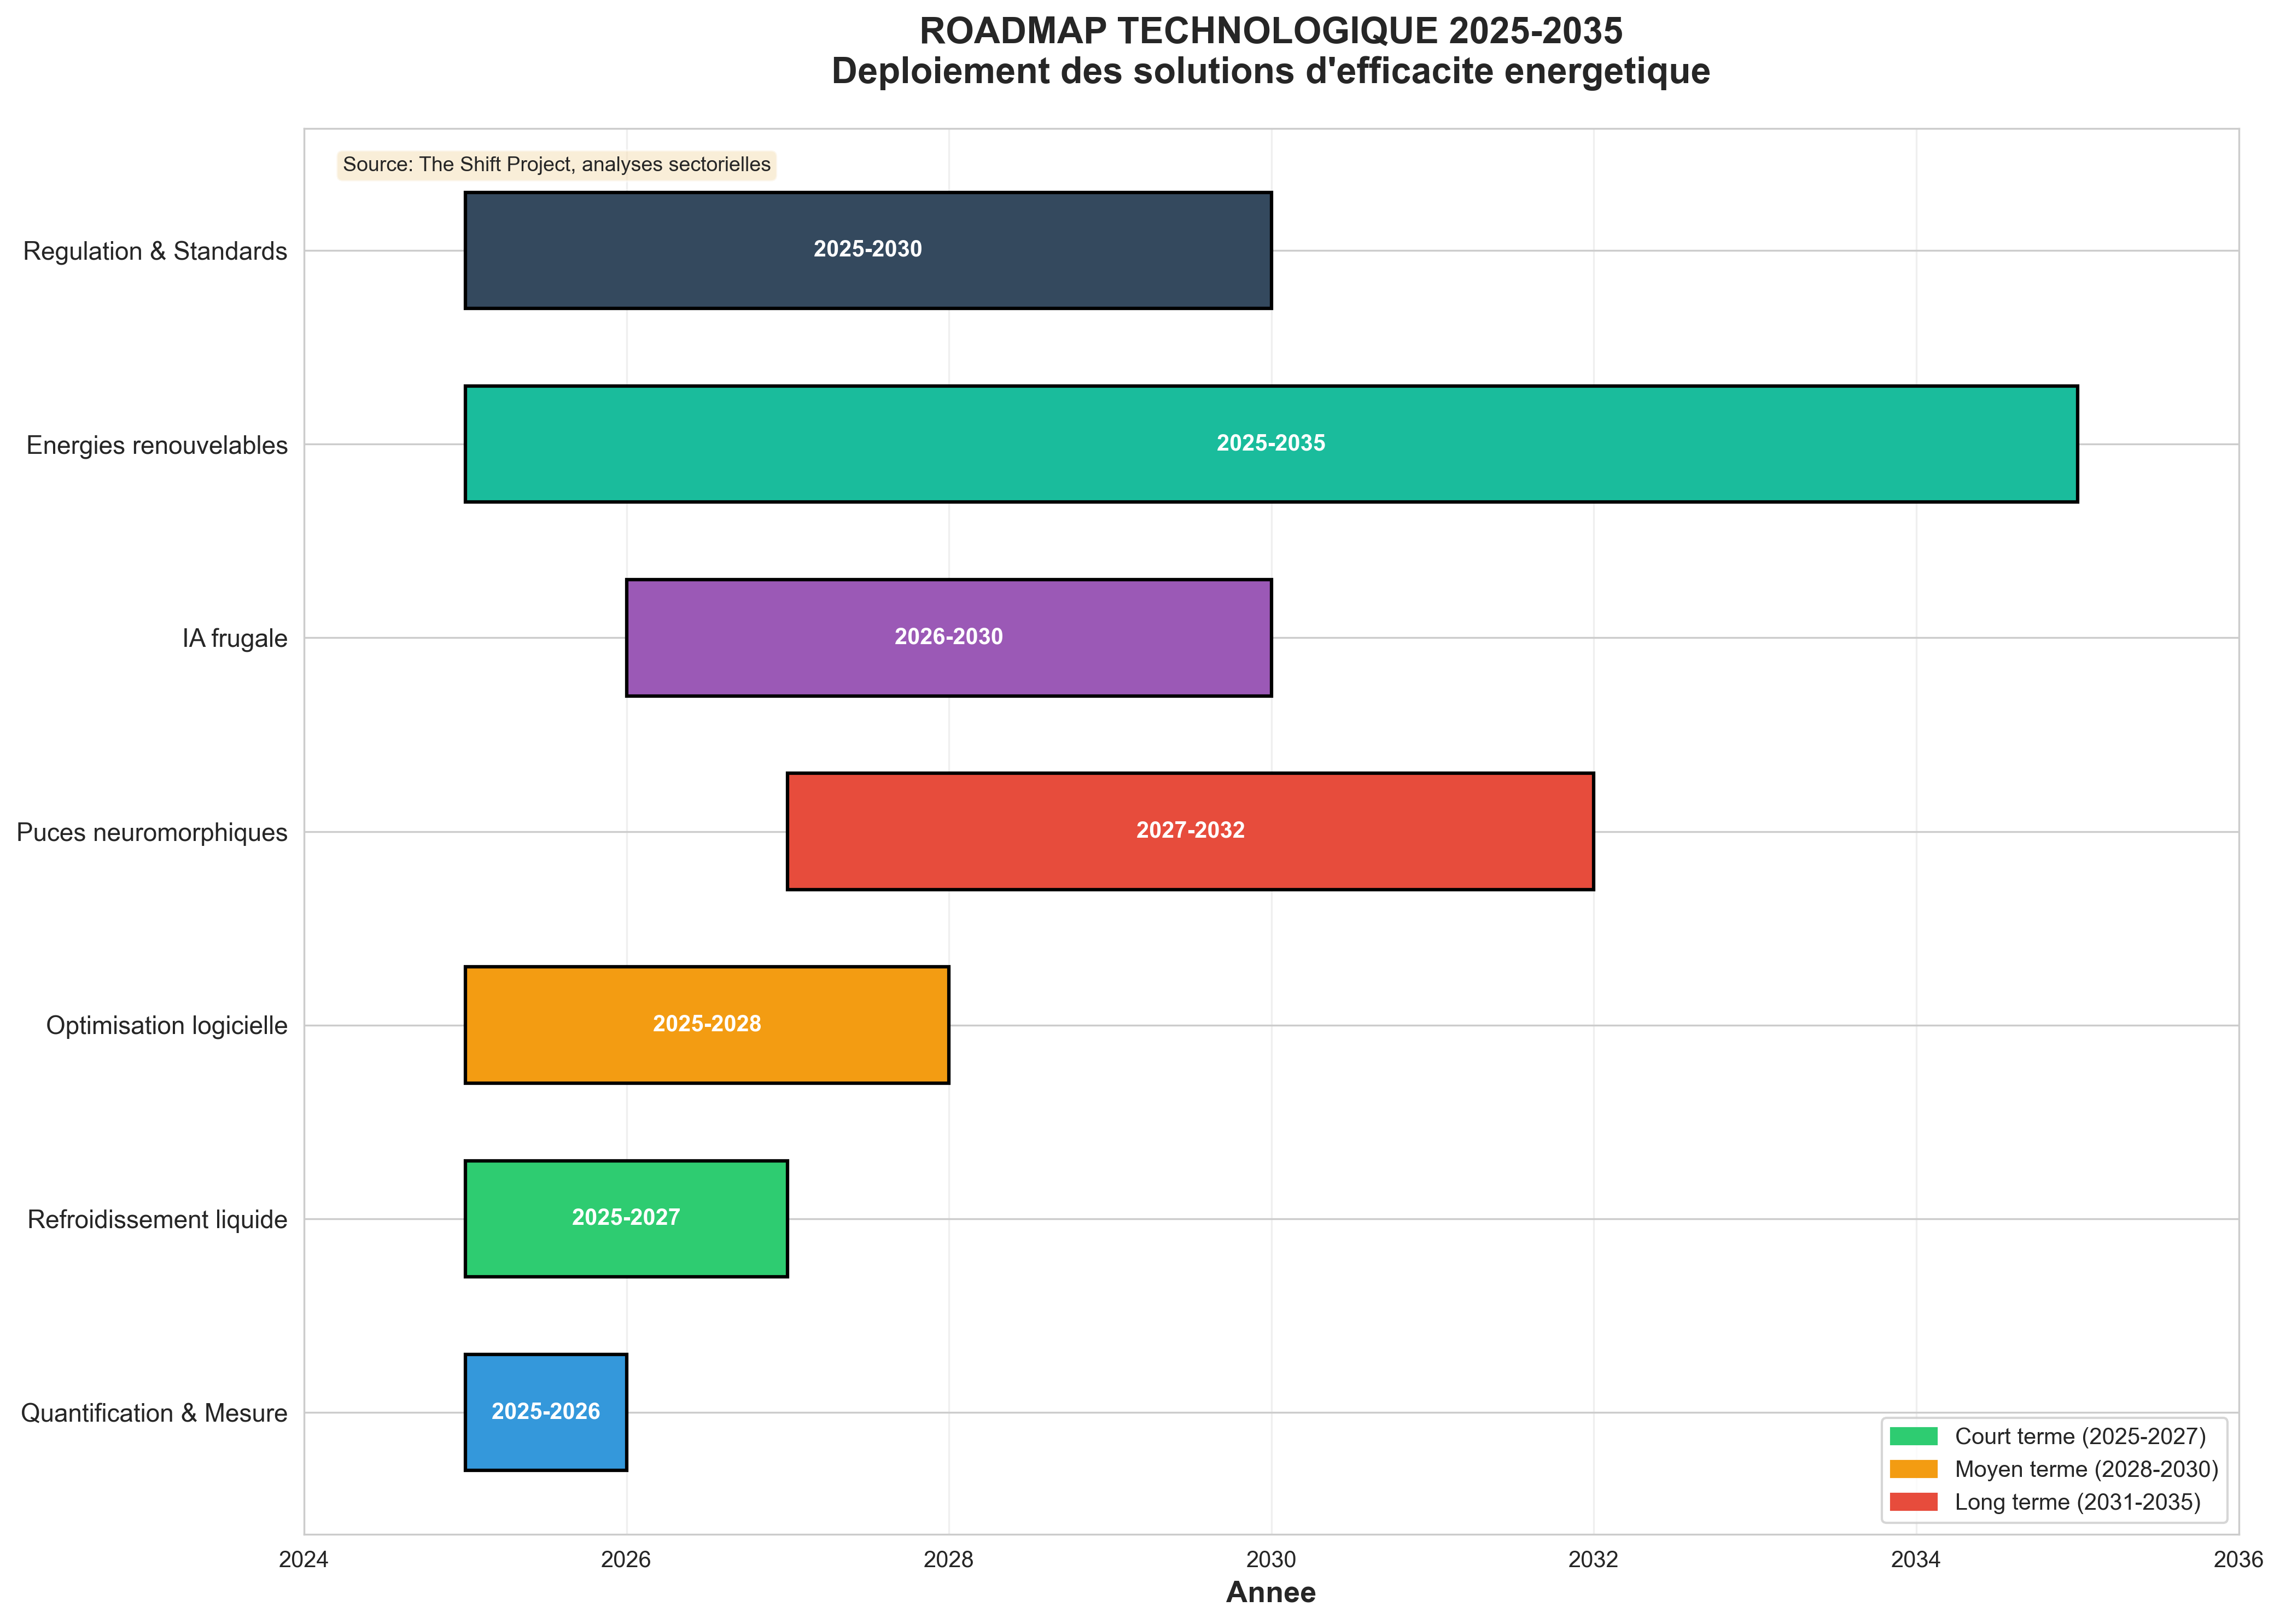

Graphique 9 cree - 7 technologies sur la periode 2025-2035


In [11]:
technologies = [
    ('Quantification & Mesure', 2025, 2026),
    ('Refroidissement liquide', 2025, 2027),
    ('Optimisation logicielle', 2025, 2028),
    ('Puces neuromorphiques', 2027, 2032),
    ('IA frugale', 2026, 2030),
    ('Energies renouvelables', 2025, 2035),
    ('Regulation & Standards', 2025, 2030)
]

fig, ax = plt.subplots(figsize=(14, 10))

colors = ['#3498db', '#2ecc71', '#f39c12', '#e74c3c', '#9b59b6', '#1abc9c', '#34495e']

for i, (tech, start, end) in enumerate(technologies):
    duration = end - start
    ax.barh(i, duration, left=start, height=0.6,
           color=colors[i], edgecolor='black', linewidth=1.5)
    
    ax.text(start + duration/2, i, f'{start}-{end}',
           ha='center', va='center', fontsize=10, fontweight='bold',
           color='white')

ax.set_yticks(range(len(technologies)))
ax.set_yticklabels([t[0] for t in technologies], fontsize=11)
ax.set_xlabel('Annee', fontsize=13, fontweight='bold')
ax.set_title("ROADMAP TECHNOLOGIQUE 2025-2035\nDeploiement des solutions d'efficacite energetique",
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlim(2024, 2036)
ax.grid(axis='x', alpha=0.3)

phase_colors = {
    'Court terme (2025-2027)': '#2ecc71',
    'Moyen terme (2028-2030)': '#f39c12',
    'Long terme (2031-2035)': '#e74c3c'
}

patches = [mpatches.Patch(color=color, label=label)
          for label, color in phase_colors.items()]
ax.legend(handles=patches, loc='lower right', fontsize=10)

ax.text(0.02, 0.98, 'Source: The Shift Project, analyses sectorielles',
        transform=ax.transAxes, fontsize=9, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig(output_dir / '09_roadmap.png', dpi=300, bbox_inches='tight')
plt.show()

print(f'Graphique 9 cree - {len(technologies)} technologies sur la periode 2025-2035')

---

## Graphique 9: Comparaison Multi-Criteres

[10/10] Generation du graphique 10...


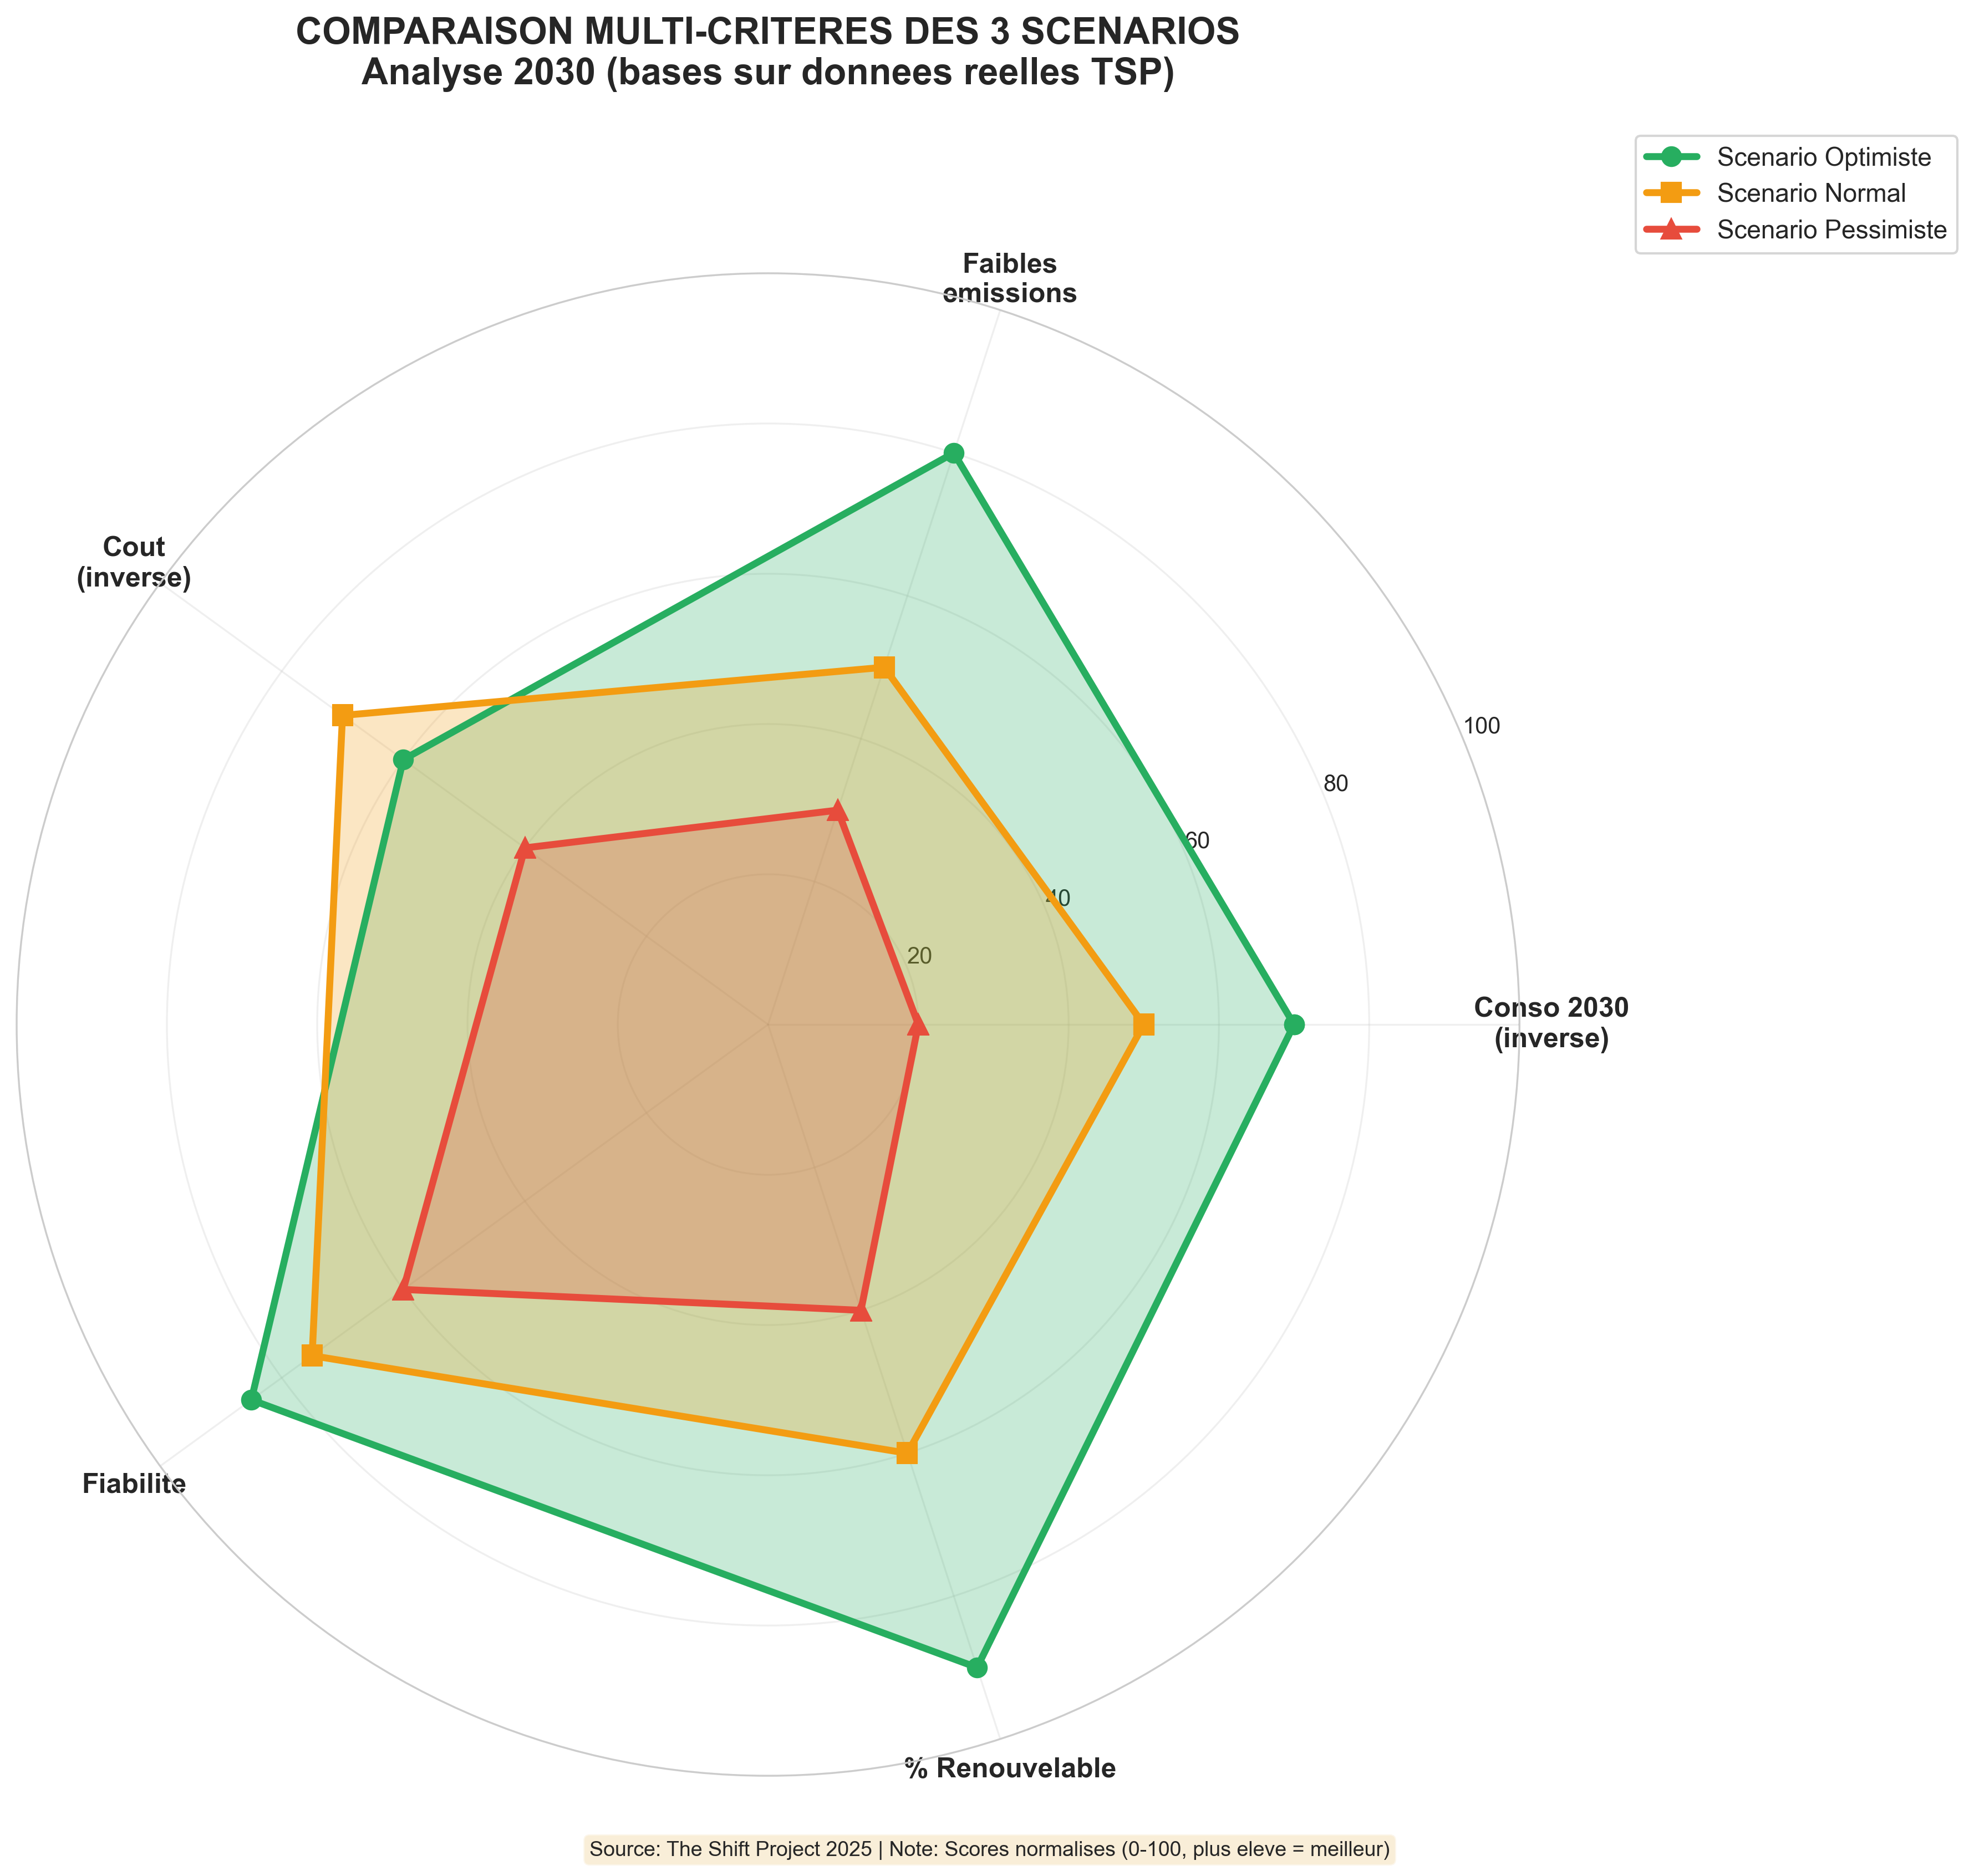

Graphique 10 cree - Comparaison des 3 scenarios sur 5 criteres


In [ ]:
categories = [
    'Conso 2030\n(inverse)',
    'Faibles\nemissions',
    'Cout\n(inverse)',
    'Fiabilite',
    '% Renouvelable'
]

# Scores normalises bases sur les donnees reelles
# Optimiste: faible conso, faibles emissions, cout eleve, bonne fiabilite, haut renouvelable
optimiste = [70, 80, 60, 85, 90]
# Normal: conso moyenne, emissions moyennes
normal = [50, 50, 70, 75, 60]
# Pessimiste: haute conso (1485 TWh), hautes emissions
pessimiste = [20, 30, 40, 60, 40]

N = len(categories)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()

optimiste += optimiste[:1]
normal += normal[:1]
pessimiste += pessimiste[:1]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(projection='polar'))

ax.plot(angles, optimiste, 'o-', linewidth=3, label='Scenario Optimiste',
       color='#27ae60', markersize=8)
ax.fill(angles, optimiste, alpha=0.25, color='#27ae60')

ax.plot(angles, normal, 's-', linewidth=3, label='Scenario Normal',
       color='#f39c12', markersize=8)
ax.fill(angles, normal, alpha=0.25, color='#f39c12')

ax.plot(angles, pessimiste, '^-', linewidth=3, label='Scenario Pessimiste',
       color='#e74c3c', markersize=8)
ax.fill(angles, pessimiste, alpha=0.25, color='#e74c3c')

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=12, fontweight='bold')

ax.set_ylim(0, 100)
ax.set_yticks([20, 40, 60, 80, 100])
ax.set_yticklabels(['20', '40', '60', '80', '100'], fontsize=10)
ax.grid(True, alpha=0.3)

ax.set_title('COMPARAISON MULTI-CRITERES DES 3 SCENARIOS\nAnalyse 2030 (bases sur donnees reelles TSP)',
            fontsize=16, fontweight='bold', pad=30, y=1.08)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=11)

fig.text(0.5, 0.02, 'Source: The Shift Project 2025 | Note: Scores normalises (0-100, plus eleve = meilleur)',
        ha='center', fontsize=9,
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig(output_dir / '10_comparaison_finale.png', dpi=300, bbox_inches='tight')
plt.show()

print(f'Graphique 10 cree - Comparaison des 3 scenarios sur 5 criteres')

---

## Graphique 10: Cas d'Usage Assistant IA Personnel

**Donnees:** Estimations basees sur les donnees IA

Graphique 1 cree: graphs\11_emissions_assistant_cr_comparaison.png


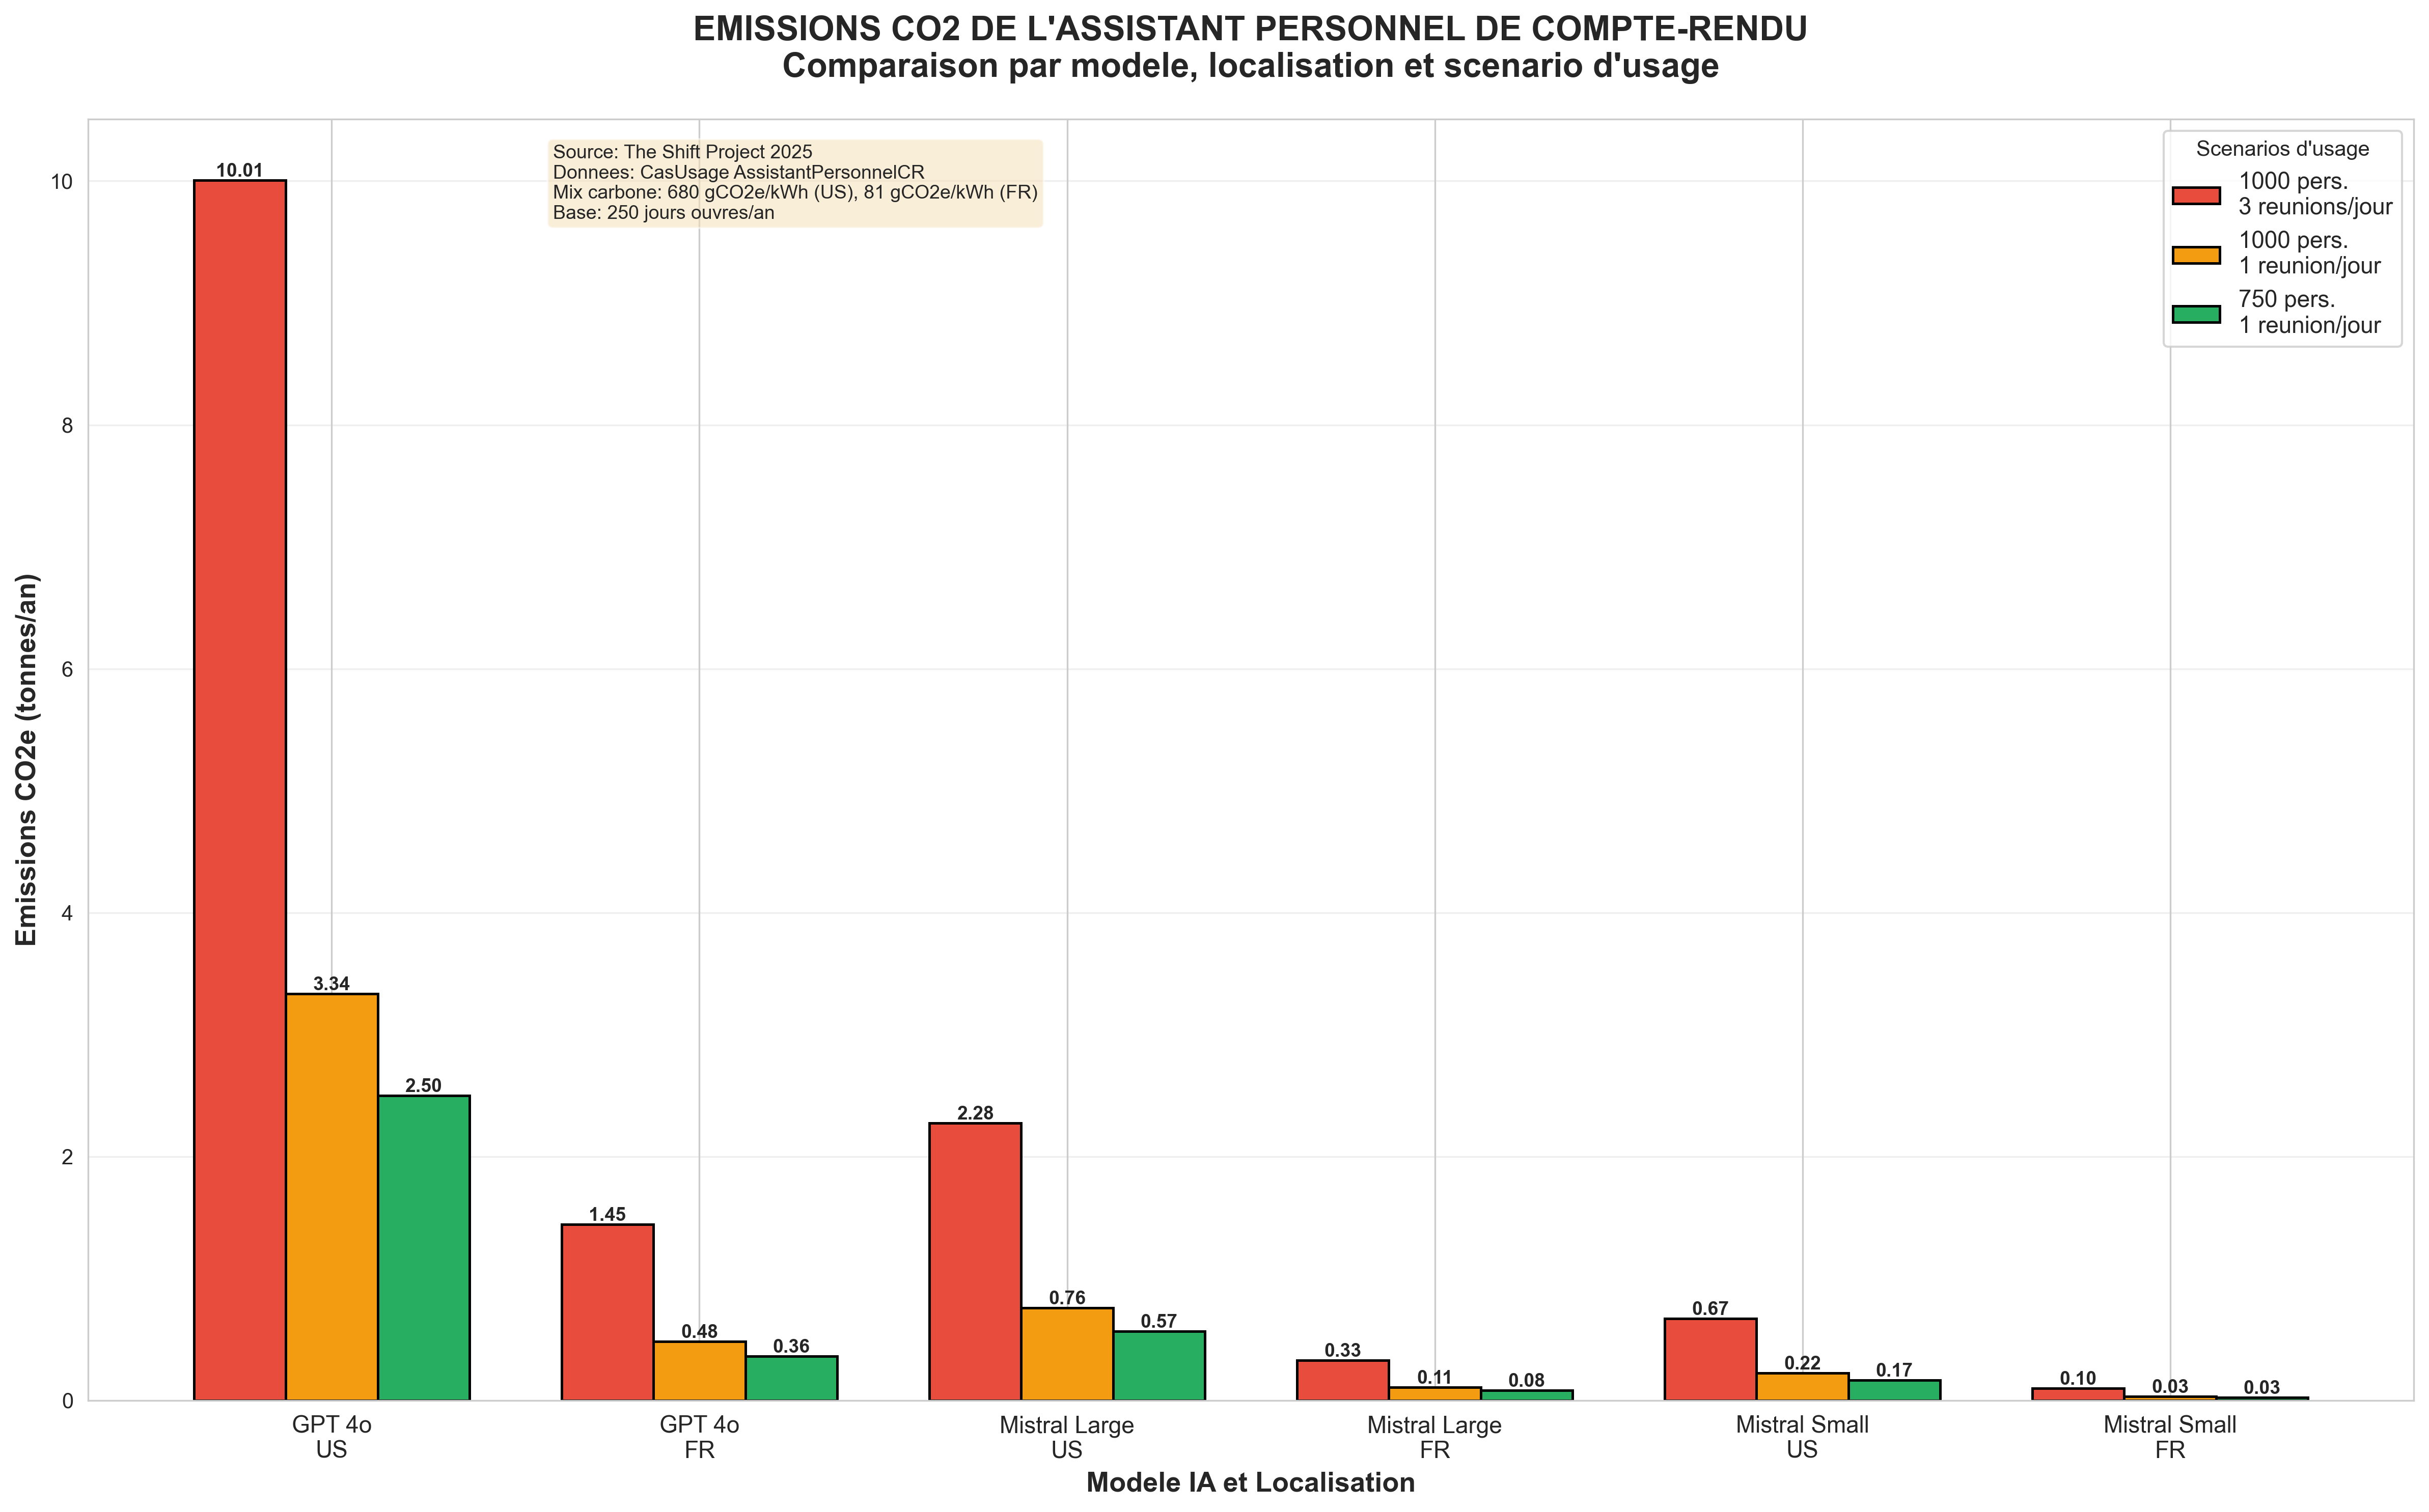

In [20]:
"""
Graphique: Emissions CO2 de l'Assistant Personnel de Compte-Rendu
Donnees: TheShiftProject_CasUsage_AssistantPersonnelCR_2025.xlsx
"""
# Configuration
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 10
output_dir = Path('graphs')
output_dir.mkdir(exist_ok=True)

# Charger les donnees
file_path = 'data/TheShiftProject_CasUsage_AssistantPersonnelCR_2025.xlsx'
df = pd.read_excel(file_path, sheet_name='Simulation', header=None)

# Extraction des donnees du tableau (lignes 10-12, colonnes 4-9)
# Ligne 10: Pour 1000 personnes qui enregistrent 3 reunions par jour ouvre
# Ligne 11: Pour 1000 personnes qui enregistrent 1 reunion par jour ouvre
# Ligne 12: Pour 750 personnes qui enregistrent 1 reunion par jour ouvre

scenarios = [
    '1000 pers.\n3 reunions/jour',
    '1000 pers.\n1 reunion/jour',
    '750 pers.\n1 reunion/jour'
]

# Modeles (colonnes 4-9)
modeles = ['GPT 4o\nUS', 'GPT 4o\nFR', 'Mistral Large\nUS',
           'Mistral Large\nFR', 'Mistral Small\nUS', 'Mistral Small\nFR']

# Extraction des valeurs (en kgCO2e) - convertir en tCO2e
donnees = []
for row_idx in [10, 11, 12]:
    row_data = []
    for col_idx in [4, 5, 6, 7, 8, 9]:
        val = float(df.iloc[row_idx, col_idx]) / 1000  # Convertir kg en tonnes
        row_data.append(val)
    donnees.append(row_data)

donnees = np.array(donnees)

# GRAPHIQUE 1: Comparaison par modele et scenario
fig, ax = plt.subplots(figsize=(16, 10))

x = np.arange(len(modeles))
width = 0.25

colors = ['#e74c3c', '#f39c12', '#27ae60']

for i, (scenario, color) in enumerate(zip(scenarios, colors)):
    offset = (i - 1) * width
    bars = ax.bar(x + offset, donnees[i], width, label=scenario,
                  color=color, edgecolor='black', linewidth=1.2)

    # Ajouter les valeurs sur les barres
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}',
                ha='center', va='bottom', fontsize=9, fontweight='bold')

ax.set_xlabel('Modele IA et Localisation', fontsize=13, fontweight='bold')
ax.set_ylabel('Emissions CO2e (tonnes/an)', fontsize=13, fontweight='bold')
ax.set_title('EMISSIONS CO2 DE L\'ASSISTANT PERSONNEL DE COMPTE-RENDU\nComparaison par modele, localisation et scenario d\'usage',
             fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(modeles, fontsize=11)
ax.legend(fontsize=11, loc='upper right', title='Scenarios d\'usage')
ax.grid(axis='y', alpha=0.3)

# Ajouter une annotation explicative
ax.text(0.2, 0.98,
        'Source: The Shift Project 2025\n' +
        'Donnees: CasUsage AssistantPersonnelCR\n' +
        'Mix carbone: 680 gCO2e/kWh (US), 81 gCO2e/kWh (FR)\n' +
        'Base: 250 jours ouvres/an',
        transform=ax.transAxes, fontsize=9, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig(output_dir / '11_emissions_assistant_cr_comparaison.png', dpi=300, bbox_inches='tight')
print(f'Graphique 1 cree: {output_dir / "11_emissions_assistant_cr_comparaison.png"}')
plt.show()

Graphique 2 cree: graphs\12_emissions_assistant_cr_localisation.png


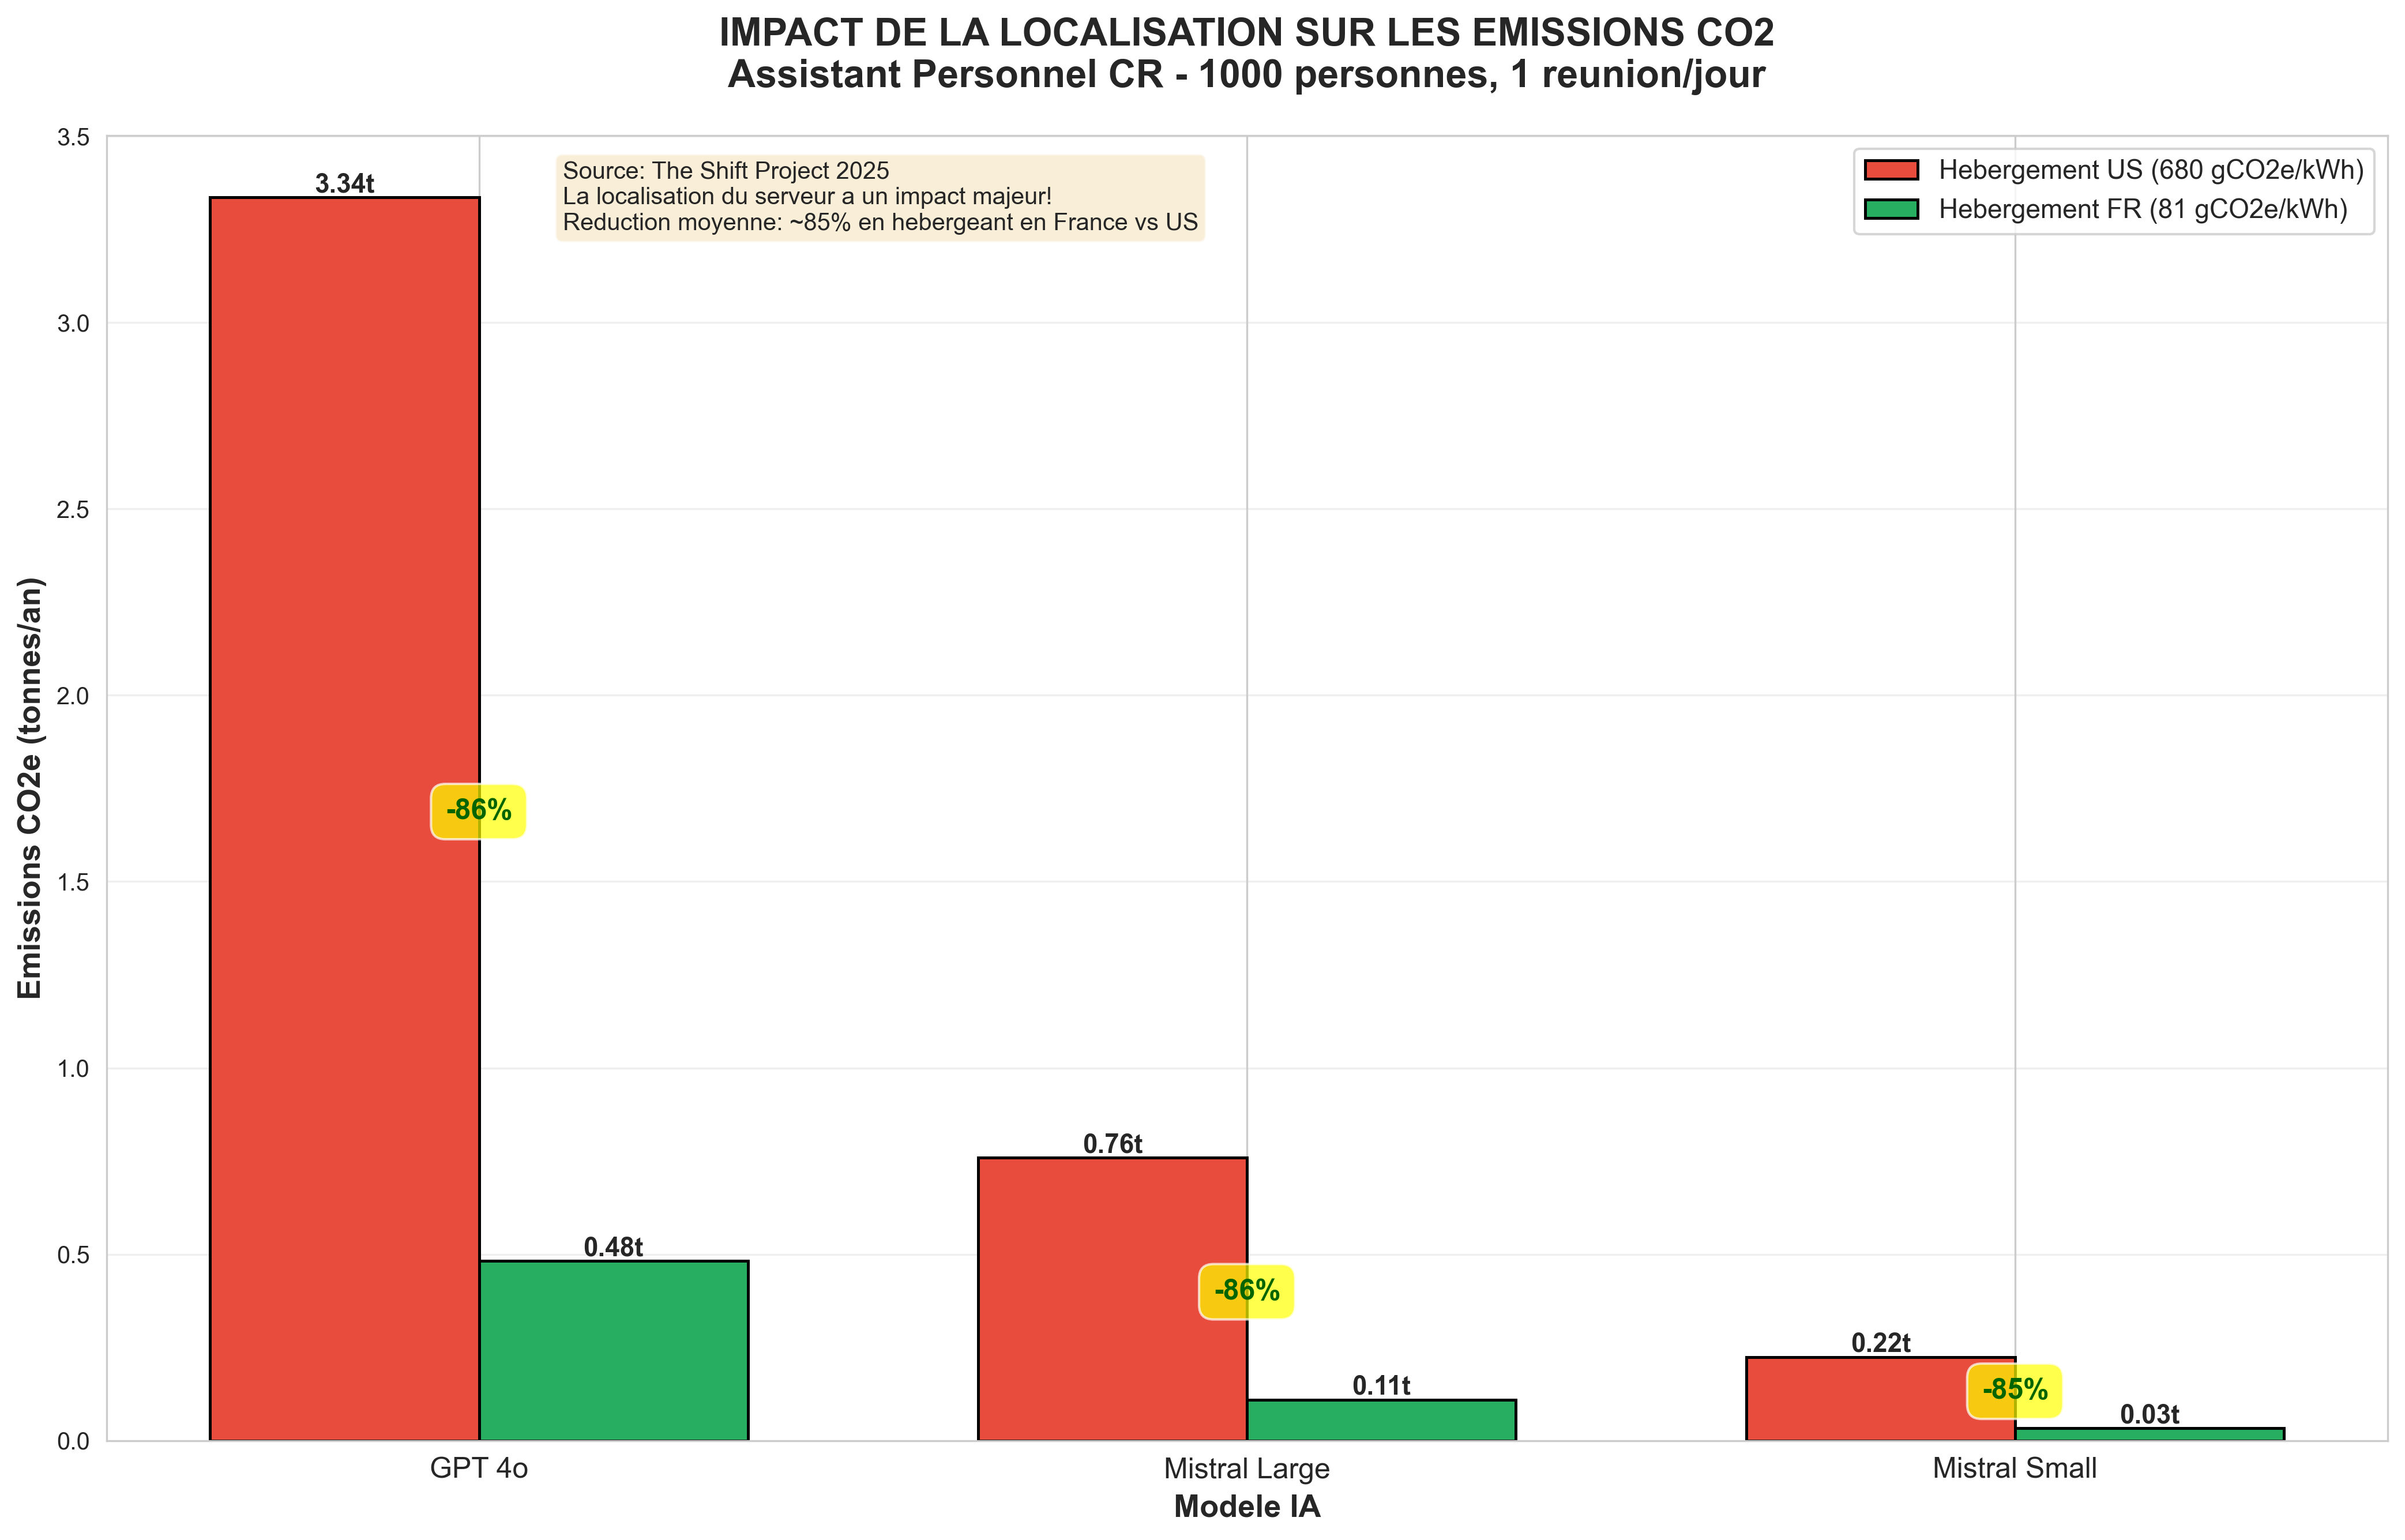

In [ ]:
# GRAPHIQUE 2: Impact de la localisation (US vs FR)
fig, ax = plt.subplots(figsize=(14, 9))

# Regrouper par paire US/FR
modeles_types = ['GPT 4o', 'Mistral Large', 'Mistral Small']
scenario_ref = 1  # 1000 pers, 1 reunion/jour (scenario median)

us_values = [donnees[scenario_ref][i] for i in [0, 2, 4]]  # Colonnes US
fr_values = [donnees[scenario_ref][i] for i in [1, 3, 5]]  # Colonnes FR

x = np.arange(len(modeles_types))
width = 0.35

bars1 = ax.bar(x - width/2, us_values, width, label='Hebergement US (680 gCO2e/kWh)',
               color='#e74c3c', edgecolor='black', linewidth=1.2)
bars2 = ax.bar(x + width/2, fr_values, width, label='Hebergement FR (81 gCO2e/kWh)',
               color='#27ae60', edgecolor='black', linewidth=1.2)

# Valeurs sur les barres
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}t',
                ha='center', va='bottom', fontsize=11, fontweight='bold')

# Calculer et afficher le ratio de reduction
for i, (us_val, fr_val) in enumerate(zip(us_values, fr_values)):
    reduction_pct = ((us_val - fr_val) / us_val) * 100
    mid_x = x[i]
    ax.annotate(f'-{reduction_pct:.0f}%',
                xy=(mid_x, max(us_val, fr_val) * 0.5),
                fontsize=12, fontweight='bold', color='darkgreen',
                ha='center',
                bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7))

ax.set_xlabel('Modele IA', fontsize=13, fontweight='bold')
ax.set_ylabel('Emissions CO2e (tonnes/an)', fontsize=13, fontweight='bold')
ax.set_title('IMPACT DE LA LOCALISATION SUR LES EMISSIONS CO2\n' +
             'Assistant Personnel CR - 1000 personnes, 1 reunion/jour',
             fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(modeles_types, fontsize=12)
ax.legend(fontsize=11, loc='upper right')
ax.grid(axis='y', alpha=0.3)

ax.text(0.2, 0.98,
        'Source: The Shift Project 2025\n' +
        'La localisation du serveur a un impact majeur!\n' +
        'Reduction moyenne: ~85% en hebergeant en France vs US',
        transform=ax.transAxes, fontsize=10, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig(output_dir / '12_emissions_assistant_cr_localisation.png', dpi=300, bbox_inches='tight')
print(f'Graphique 2 cree: {output_dir / "12_emissions_assistant_cr_localisation.png"}')
plt.show()


Graphique 3 cree (sans Eco-deploiement): graphs\13_emissions_assistant_cr_leviers_sans_eco_deploiement.png


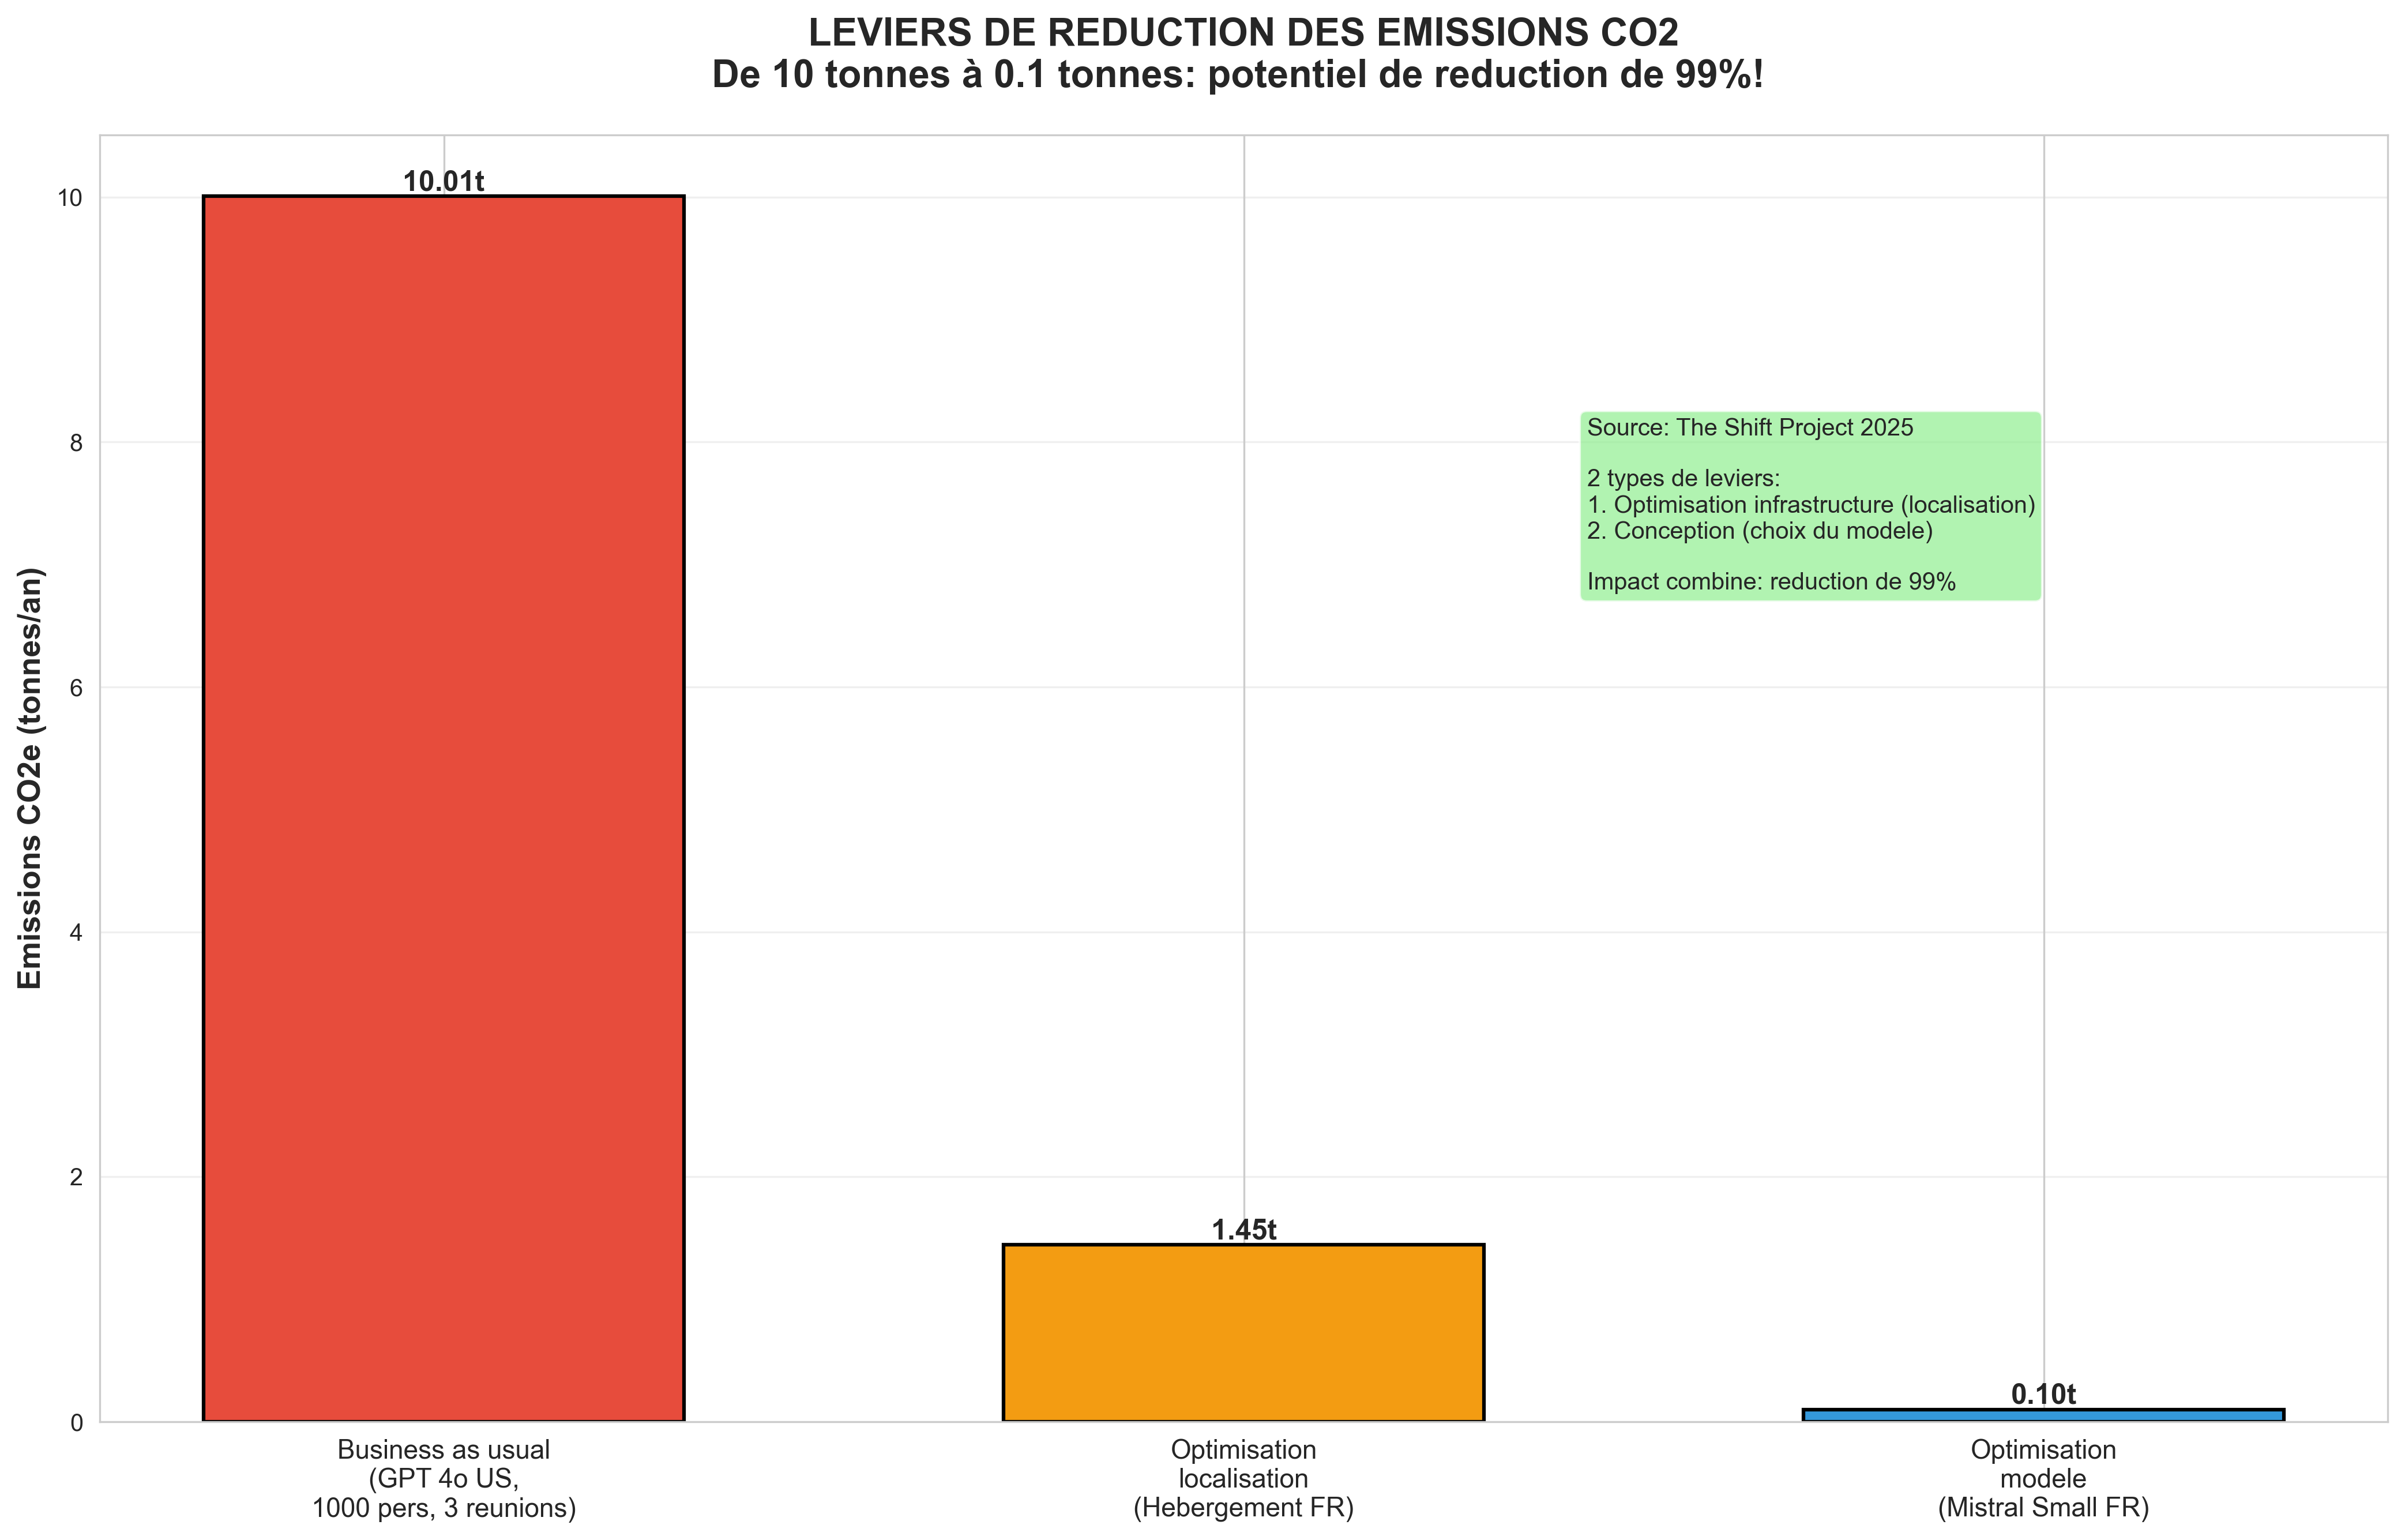

In [ ]:
# GRAPHIQUE 3: Leviers de reduction des emissions (sans Eco-deploiement)
fig, ax = plt.subplots(figsize=(14, 9))

# Mise à jour des données pour exclure "Eco-deploiement"
leviers = [
    'Business as usual\n(GPT 4o US,\n1000 pers, 3 reunions)',
    'Optimisation\nlocalisation\n(Hebergement FR)',
    'Optimisation\nmodele\n(Mistral Small FR)'
]

valeurs_leviers = [
    donnees[0][0],  # Business as usual: 1000 pers, 3 reunions, GPT4o US
    donnees[0][1],  # Optimisation localisation: GPT4o FR
    donnees[0][5]   # Optimisation conception: Mistral Small FR
]

colors_leviers = ['#e74c3c', '#f39c12', '#3498db']

bars = ax.bar(range(len(leviers)), valeurs_leviers, color=colors_leviers,
              edgecolor='black', linewidth=1.5, width=0.6)

# Valeurs sur les barres
for i, (bar, val) in enumerate(zip(bars, valeurs_leviers)):
    ax.text(bar.get_x() + bar.get_width()/2., bar.get_height(),
            f'{val:.2f}t',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

ax.set_xticks(range(len(leviers)))
ax.set_xticklabels(leviers, fontsize=11)
ax.set_ylabel('Emissions CO2e (tonnes/an)', fontsize=13, fontweight='bold')
ax.set_title('LEVIERS DE REDUCTION DES EMISSIONS CO2\n' +
             'De 10 tonnes à 0.1 tonnes: potentiel de reduction de 99%! ',
             fontsize=16, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3)

ax.text(0.65, 0.78,
        'Source: The Shift Project 2025\n\n' +
        '2 types de leviers:\n' +
        '1. Optimisation infrastructure (localisation)\n' +
        '2. Conception (choix du modele)\n\n' +
        'Impact combine: reduction de 99%',
        transform=ax.transAxes, fontsize=10, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))

plt.tight_layout()
plt.savefig(output_dir / '13_emissions_assistant_cr_leviers_sans_eco_deploiement.png', dpi=300, bbox_inches='tight')
print(f'Graphique 3 cree (sans Eco-deploiement): {output_dir / "13_emissions_assistant_cr_leviers_sans_eco_deploiement.png"}')
plt.show()
